In [2]:
import yt
import unyt
# import yt_idv
import caesar
# %matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, PathPatch
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.colors import Normalize
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.text import TextPath
from matplotlib.transforms import Affine2D

# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)

# import pandas as pd

import sklearn

# Load particle information in snapshot with yt

In [3]:
# res_level = '1'
# halo_id = '3224'
# snap_num = '151'
# snap_num0 = '151'
# sim_type = '_grad'

# sim = 'Hyenas-C Grad'

name = 'Manhattan Suite L0 - Halo 0'
specific_halo_index = 0

In [4]:
# snap_file = f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}{sim_type}/snapshot_{snap_num}.hdf5'
snap_file = '/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/snapshot_272.hdf5'
snap = yt.load(snap_file)

yt : [INFO     ] 2025-10-29 18:50:53,998 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2025-10-29 18:50:54,011 Calculating time from 3.300e-01 to be 1.023e+17 seconds
yt : [INFO     ] 2025-10-29 18:50:54,012 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2025-10-29 18:50:54,111 Parameters: current_time              = 1.0227818617886229e+17 s
yt : [INFO     ] 2025-10-29 18:50:54,112 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2025-10-29 18:50:54,112 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2025-10-29 18:50:54,113 Parameters: domain_right_edge         = [1000000. 1000000. 1000000.]
yt : [INFO     ] 2025-10-29 18:50:54,114 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2025-10-29 18:50:54,114 Parameters: current_redshift          = 2.030303030303029
yt : [INFO     ] 2025-10-29 18:50:54,115 Parameters: omega_lambda              = 0.692
yt : [INFO     ] 2025-10-29 18:50:54,115

# Load caesar file

In [5]:
# caesar_file0 = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num0}.hdf5'
# obj0 = caesar.load(caesar_file0)

In [6]:
# caesar_file = f'/project/b/babul/aspadawe/snapshots/HyenasC/L{res_level}/SimbaC_L1_Calibration/halo_{halo_id}{sim_type}/caesar_fof/caesar_{snap_num}_haloid-fof_lowres-[2].hdf5'
caesar_file = '/scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_272.hdf5'
obj = caesar.load(caesar_file)

yt : [INFO     ] 2025-10-29 18:50:55,415 Opening /scratch/aspadawe/snapshots/ManhattanSuite/Simba/simba_9Rvir_1x/halo00000/halo00000/Groups/caesar_272.hdf5
yt : [INFO     ] 2025-10-29 18:50:55,485 Found 25691 halos
yt : [INFO     ] 2025-10-29 18:50:55,521 Found 2055 galaxies


In [209]:
# # caesar_file = f'/scratch/b/babul/aspadawe/snapshots/Hyenasc_L{res_level}_zooms/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num}.hdf5'
# # caesar_file = f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}/Groups/Caesar_halo_{halo_id}_{snap_num}.hdf5'
# caesar_file = f'/home/b/babul/aspadawe/scripts/caesar_files/test.hdf5'
# obj = caesar.load(caesar_file)

#### Link snapshots with caesar progen

In [164]:
caesar.progen.check_if_progen_is_present(caesar_file, 'progen_halo_dm')

True

In [165]:
caesar.progen.check_if_progen_is_present(caesar_file0, 'progen_halo_dm')

True

In [166]:
caesar.progen.collect_group_IDs(obj, data_type='halo', part_type='dm',
                                snap_dir=f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}')

(6617,
 array([36575776, 34078285, 30409308, ..., 38522908, 38596894, 38523725],
       shape=(9867094,)),
 array([   0,    0,    0, ..., 6616, 6616, 6616],
       shape=(9867094,), dtype=int32),
 array([      0,  663329, 1703271, ..., 9866966, 9867030, 9867095],
       shape=(6618,)))

In [167]:
caesar.progen.collect_group_IDs(obj0, data_type='halo', part_type='dm',
                                snap_dir=f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}')

(6617,
 array([36575776, 34078285, 30409308, ..., 38522908, 38596894, 38523725],
       shape=(9867094,)),
 array([   0,    0,    0, ..., 6616, 6616, 6616],
       shape=(9867094,), dtype=int32),
 array([      0,  663329, 1703271, ..., 9866966, 9867030, 9867095],
       shape=(6618,)))

In [168]:
caesar.progen.get_progen_redshift(caesar_file, 'progen_halo_dm')

np.float64(0.01674167288897066)

In [169]:
caesar.progen.get_progen_redshift(caesar_file0, 'progen_halo_dm')

np.float64(0.01674167288897066)

In [170]:
progens = caesar.progen.progen_finder(obj_current=obj0, obj_target=obj, caesar_file=caesar_file,
                                      snap_dir=f'/home/b/babul/wcui/data/HYENAS/Level{res_level}/halo_{halo_id}',
                                      data_type='halo', part_type='dm', recompute=True,
                                      save=False, n_most=1, min_in_common=0.1, nproc=1,
                                      match_frac=True, reverse_match=False)

yt : [INFO     ] 2025-06-16 20:19:01,918 Progen doing 6617 groups (nproc=1), RAM=1.248 GB


In [171]:
progens

(array([[   0],
        [   1],
        [   2],
        ...,
        [6614],
        [6615],
        [6616]], shape=(6617, 1), dtype=int32),
 array([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], shape=(6617, 1)))

In [172]:
progens[0][3]

array([3], dtype=int32)

# Information

In [7]:
age0 = unyt.unyt_array(13.863083993383874, 'Gyr')

In [8]:
print("Redshift =", snap.current_redshift)

Redshift = 2.030303030303029


In [9]:
print("a =", snap.scale_factor)

a = 0.3300000000000001


In [10]:
print("Age =", snap.current_time.in_units('Gyr'))

Age = 3.2410001450953905 Gyr


In [11]:
print(f"Lookback time = {age0 - snap.current_time}")

Lookback time = 10.622083848288483 Gyr


In [12]:
print("h =", snap.hubble_constant)

h = 0.6781


In [13]:
snap.omega_lambda

np.float64(0.692)

In [14]:
# snap.print_stats()

In [15]:
snap.field_list

yt : [INFO     ] 2025-10-29 18:51:01,201 Allocating for 8.386e+07 particles
Loading particle index: 100%|██████████| 126/126 [00:00<00:00, 4396.55it/s]


[('PartType0', 'AGS-Softening'),
 ('PartType0', 'AccKey'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'HaloID'),
 ('PartType0', 'ID_Generations'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'NWindLaunches'),
 ('PartType0

In [16]:
snap.derived_field_list

[('PartType0', 'AGS-Softening'),
 ('PartType0', 'AccKey'),
 ('PartType0', 'C_metallicity'),
 ('PartType0', 'C_nuclei_density'),
 ('PartType0', 'C_nuclei_mass_density'),
 ('PartType0', 'Ca_metallicity'),
 ('PartType0', 'Ca_nuclei_density'),
 ('PartType0', 'Ca_nuclei_mass_density'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'DelayTime'),
 ('PartType0', 'Density'),
 ('PartType0', 'Dust_Masses'),
 ('PartType0', 'Dust_Metallicity'),
 ('PartType0', 'El_number_density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'Fe_metallicity'),
 ('PartType0', 'Fe_nuclei_density'),
 ('PartType0', 'Fe_nuclei_mass_density'),
 ('PartType0', 'FractionH2'),
 ('PartType0', 'GrackleHI'),
 ('PartType0', 'GrackleHII'),
 ('PartType0', 'GrackleHM'),
 ('PartType0', 'GrackleHeI'),
 ('PartType0', 'GrackleHeII'),
 ('PartType0', 'GrackleHeIII'),
 ('PartType0', 'H_nuclei_density'),
 ('PartType0', 'H_p0_density'),
 ('PartType0', 'H_p0_fraction'),
 ('PartType0', 'H_p0_mass'),
 ('PartType0', 'H_p0_number_density'

In [17]:
snap.domain_width.in_units('Mpc/h')

unyt_array([330., 330., 330.], 'Mpc/h')

In [18]:
snap.particle_types

('PartType2',
 'PartType0',
 'PartType5',
 'PartType1',
 'PartType4',
 'all',
 'nbody')

In [19]:
snap.particle_types_raw

('PartType2', 'PartType0', 'PartType5', 'PartType1', 'PartType4')

In [20]:
snap.particle_type_counts

{'PartType0': np.int64(31991342),
 'PartType1': np.int64(32772289),
 'PartType2': np.int64(18336994),
 'PartType3': np.int64(0),
 'PartType4': np.int64(755227),
 'PartType5': np.int64(1772)}

In [21]:
data = snap.all_data()

In [22]:
data['PartType4', 'Masses']

unyt_array([0.001663  , 0.00167403, 0.00170585, ..., 0.00185089, 0.00177028,
       0.00177898], shape=(755227,), units='code_mass')

In [23]:
data['PartType4', 'particle_mass']

unyt_array([0.001663  , 0.00167403, 0.00170585, ..., 0.00185089, 0.00177028,
       0.00177898], shape=(755227,), units='code_mass')

# Isolate IGrM

In [136]:
snap_data = snap.all_data()

In [137]:
snap_data['PartType0', 'Temperature']

unyt_array([ 94108.94634025, 157660.88461431, 128424.12201122, ...,
         7335.07012145,   8804.33184584,  12643.59812445],
      shape=(17906273,), units='K')

In [138]:
snap_data['PartType0', 'DelayTime']

unyt_array([0., 0., 0., ..., 0., 0., 0.], shape=(17906273,), units='(dimensionless)')

In [147]:
snap_data['PartType0', 'H_nuclei_density']

unyt_array([1.46826369e-06, 1.53541996e-06, 1.32962223e-06, ...,
       4.32033434e-07, 3.99806505e-07, 3.04217667e-07], shape=(17906273,), units='cm**(-3)')

In [259]:
@yt.particle_filter(requires=['Temperature', 'H_nuclei_density', 'DelayTime'], filtered_type='PartType0')
def igrm(pfilter, data):
    # filter = data[pfilter.filtered_type, 'Temperature'] >= '500000 K' & data[pfilter.filtered_type, 'H_nuclei_density'] < '0.13 cm**-3' & data[pfilter.filtered_type, 'DelayTime'] == 0
    # filter = data[pfilter.filtered_type, 'Temperature'].in_units('K') >= 5e5 & data[pfilter.filtered_type, 'H_nuclei_density'].in_units('cm**-3') < 0.13 & data[pfilter.filtered_type, 'DelayTime'] == 0
    # filter = data['PartType0', 'Temperature'] >= '5e5 K' & data['PartType0', 'H_nuclei_density'] < '0.13 cm**-3' & data['PartType0', 'DelayTime'] == 0
    filter = np.logical_and(data[pfilter.filtered_type, 'Temperature'].in_units('K') >= 5e5,
                            data[pfilter.filtered_type, 'H_nuclei_density'].in_units('cm**-3') < 0.13)
    filter = np.logical_and(filter, data[pfilter.filtered_type, 'DelayTime'] == 0)
    return filter

# yt.add_particle_filter('igrm', function=igrm, 
#                        filtered_type='PartType0', 
#                        requires=['Temperature, H_nuclei_density, DelayTime'])

yt : [WARNING  ] 2025-08-15 15:19:41,601 The igrm particle filter already exists. Overriding.


In [260]:
snap.add_particle_filter('igrm')

yt : [INFO     ] 2025-08-15 15:19:42,896 Allocating for 4.322e+07 particles
Loading particle index: 100%|██████████| 78/78 [00:00<00:00, 4275.15it/s]
yt : [WARNING  ] 2025-08-15 15:19:43,777 It appears that you are filtering on an SPH field type. It is recommended to use 'gas' as the filtered particle type in this case instead.


True

# Find desired halo(s)

In [218]:
target_m500c = unyt.unyt_array(1e13, 'Msun')

In [219]:
target_m500c

unyt_array(1.e+13, 'Msun')

In [220]:
halo_minpotpos = unyt.unyt_array([halo.minpotpos.in_units('Mpc') for halo in obj.halos])

In [221]:
halo_minpotpos

unyt_array([[151.51636, 141.91026, 143.75975],
       [154.22932, 135.52592, 153.31105],
       [154.6779 , 132.15027, 157.21649],
       ...,
       [162.96423, 134.81625, 141.03165],
       [150.8625 , 143.19373, 141.37102],
       [155.13707, 138.47627, 146.07506]], shape=(18355, 3), dtype=float32, units='Mpc')

In [222]:
len(halo_minpotpos)

18355

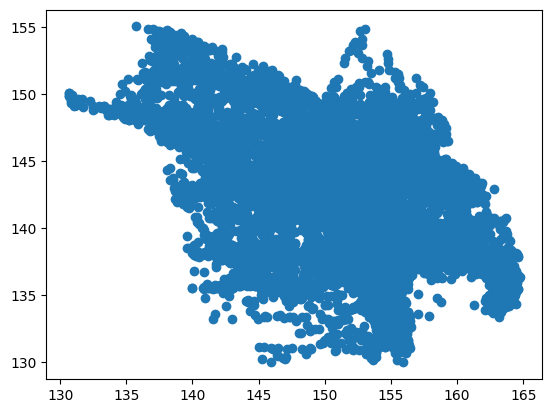

In [223]:
plt.scatter(halo_minpotpos[:,0], halo_minpotpos[:,1])

In [224]:
halo_m500c = unyt.unyt_array([halo.virial_quantities['m500c'] for halo in obj.halos])

In [225]:
halo_m500c

unyt_array([9.38145743e+12, 6.57149867e+12, 5.12916665e+12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(18355,), units='Msun')

In [226]:
halo_contamination = unyt.unyt_array([halo.contamination for halo in obj.halos])

In [227]:
halo_contamination

unyt_array([0.00000000e+00, 6.60064855e-05, 2.80551970e-01, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(18355,), units='(dimensionless)')

In [228]:
halo_nonzero_contamination_index = np.nonzero(np.array(halo_contamination)!=0)[0]

In [229]:
halo_nonzero_contamination_index

array([    1,     2,     5,     6,     7,     8,    10,    12,    15,
          16,    18,    20,    21,    22,    29,    30,    31,    34,
          43,    49,    50,    52,    54,    56,    57,    59,    61,
          62,    64,    65,    73,    74,    76,    77,    81,    82,
          87,    90,    92,    95,    98,    99,   101,   102,   103,
         107,   108,   116,   119,   121,   122,   125,   126,   131,
         132,   134,   136,   138,   144,   147,   148,   151,   153,
         155,   158,   159,   174,   175,   178,   182,   192,   194,
         197,   198,   208,   209,   217,   219,   222,   224,   225,
         226,   227,   228,   229,   232,   238,   242,   244,   263,
         265,   266,   267,   271,   272,   281,   282,   284,   296,
         299,   301,   302,   303,   304,   310,   314,   315,   319,
         327,   329,   330,   331,   332,   333,   334,   338,   342,
         344,   345,   346,   350,   353,   354,   366,   369,   373,
         374,   379,

In [230]:
halo_contamination0_index = np.nonzero(np.array(halo_contamination)==0)[0]
# halo_contamination0_index = np.array(halo_contamination)==0

In [231]:
halo_contamination0_index

array([    0,     3,     4, ..., 18352, 18353, 18354], shape=(17585,))

In [232]:
value_of_contamination0 = min(np.log10(halo_contamination)[np.array(halo_contamination)>0])-1

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning:

divide by zero encountered in log10



/tmp/ipykernel_3186327/245451921.py:2: RuntimeWarning:

divide by zero encountered in log10



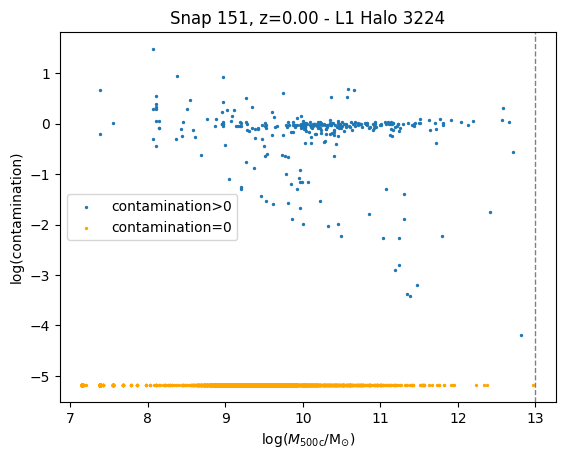

In [233]:
plt.scatter(np.log10(halo_m500c), np.log10(halo_contamination), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),
            np.full(len(halo_contamination0_index), value_of_contamination0),
            s=2, color='orange', label='contamination=0')
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

In [234]:
print(f'Number of contaminated halos: {len(halo_nonzero_contamination_index)}')

Number of contaminated halos: 770


In [235]:
print(f'Number of uncontaminated halos: {len(halo_contamination0_index)}')

Number of uncontaminated halos: 17585


In [236]:
unyt.unyt_array(halo_m500c)

unyt_array([9.38145743e+12, 6.57149867e+12, 5.12916665e+12, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(18355,), units='Msun')

In [237]:
## Using only halos with 0 contamination, choose halo with mass closest to target mass
halo_m500c_contamination0 = unyt.unyt_array(halo_m500c)[halo_contamination0_index]
# index_of_halo_with_contamination0_and_target_m500c = 
specific_halo_index = halo_contamination0_index[np.argmin(np.abs(halo_m500c_contamination0 - target_m500c))]

# specific_halo_index = 1

In [238]:
specific_halo_index

np.int64(0)

## Old/bad

In [17]:
hyenas_l1_m200c = {
    '252':unyt.unyt_array(10**13.846, 'Msun'),
    '284':unyt.unyt_array(10**13.882, 'Msun'),
    '2919':unyt.unyt_array(10**12.986, 'Msun'),
    '3224':unyt.unyt_array(10**13.007, 'Msun'),
    '612':unyt.unyt_array(10**13.489, 'Msun'),
    '947':unyt.unyt_array(10**13.499, 'Msun'),
}

In [94]:
specific_halo_m200c = hyenas_l1_m200c[halo_id]

In [95]:
specific_halo_m200c

unyt_array(7.6207901e+13, 'Msun')

In [93]:
hyenas_l1_pos = {
    '252':unyt.unyt_array(np.array([151958.672,106912.969,11960.645])*snap.scale_factor/snap.hubble_constant, 'kpc'),
    '284':unyt.unyt_array(np.array([135855.266,101053.422,79368.945])*snap.scale_factor/snap.hubble_constant, 'kpc'),
    '2919':unyt.unyt_array(np.array([105932.586,156340.703,106440.75])*snap.scale_factor/snap.hubble_constant, 'kpc'),
    '3224':unyt.unyt_array(np.array([103161.32,136991.281,104131.414])*snap.scale_factor/snap.hubble_constant, 'kpc'),
    '612':unyt.unyt_array(np.array([34537.684,183310.156,8333.137])*snap.scale_factor/snap.hubble_constant, 'kpc'),
    '947':unyt.unyt_array(np.array([40515.109,60984.898,15441.759])*snap.scale_factor/snap.hubble_constant, 'kpc'),
}

In [139]:
hyenas_l1_pos = {
    '252':unyt.unyt_array(np.array([151958.672,106912.969,11960.645]), 'kpc'),
    '284':unyt.unyt_array(np.array([135855.266,101053.422,79368.945]), 'kpc'),
    '2919':unyt.unyt_array(np.array([105932.586,156340.703,106440.75]), 'kpc'),
    '3224':unyt.unyt_array(np.array([103161.32,136991.281,104131.414]), 'kpc'),
    '612':unyt.unyt_array(np.array([34537.684,183310.156,8333.137]), 'kpc'),
    '947':unyt.unyt_array(np.array([40515.109,60984.898,15441.759]), 'kpc'),
}

In [140]:
specific_halo_pos_cui = hyenas_l1_pos[halo_id]

In [141]:
specific_halo_pos_cui.in_units('Mpc')

unyt_array([135.855266, 101.053422,  79.368945], 'Mpc')

In [20]:
# obj.halos[252].galaxy_index_list

In [21]:
# obj.galaxies[793].parent_halo_index

In [22]:
# obj.halos[252].minpotpos#.in_units('Mpc')

In [23]:
# obj.halos[252].virial_quantities['m200c']

In [65]:
halo_m200c = [halo.virial_quantities['m200c'] for halo in obj.halos]

In [66]:
halo_m200c

[unyt_quantity(9.75631811e+12, 'Msun'),
 unyt_quantity(1.68624893e+13, 'Msun'),
 unyt_quantity(7.83272378e+12, 'Msun'),
 unyt_quantity(1.20046821e+13, 'Msun'),
 unyt_quantity(0., 'Msun'),
 unyt_quantity(4.05927782e+12, 'Msun'),
 unyt_quantity(2.89756099e+12, 'Msun'),
 unyt_quantity(2.04517881e+12, 'Msun'),
 unyt_quantity(2.46302376e+12, 'Msun'),
 unyt_quantity(2.83492745e+12, 'Msun'),
 unyt_quantity(3.00624983e+12, 'Msun'),
 unyt_quantity(2.68613609e+12, 'Msun'),
 unyt_quantity(2.32502854e+12, 'Msun'),
 unyt_quantity(1.56229711e+12, 'Msun'),
 unyt_quantity(1.39181687e+12, 'Msun'),
 unyt_quantity(1.52354043e+12, 'Msun'),
 unyt_quantity(0., 'Msun'),
 unyt_quantity(1.14798494e+12, 'Msun'),
 unyt_quantity(1.02891068e+12, 'Msun'),
 unyt_quantity(9.96226761e+11, 'Msun'),
 unyt_quantity(4.24590574e+11, 'Msun'),
 unyt_quantity(1.09063425e+12, 'Msun'),
 unyt_quantity(1.09456969e+12, 'Msun'),
 unyt_quantity(8.60042887e+11, 'Msun'),
 unyt_quantity(7.10286508e+11, 'Msun'),
 unyt_quantity(8.2919509

/tmp/ipykernel_153393/1274963041.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(halo_m200c), np.log10(halo_contamination), s=2)
/tmp/ipykernel_153393/1274963041.py:3: RuntimeWarning: divide by zero encountered in log10
  np.full(len(halo_contamination0_index), min(np.log10(halo_contamination)[np.array(halo_contamination)>0])-1),


NameError: name 'specific_halo_m200c' is not defined

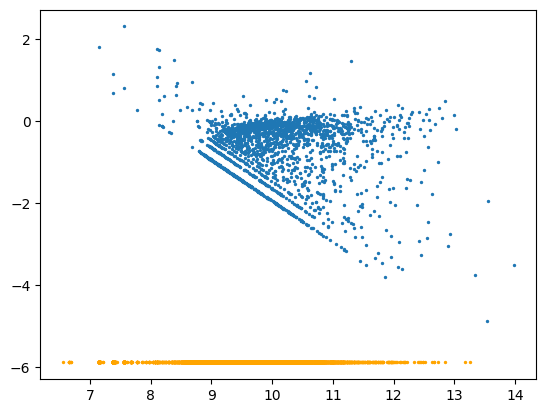

In [77]:
plt.scatter(np.log10(halo_m200c), np.log10(halo_contamination), s=2)
plt.scatter(np.log10(np.array(halo_m200c)[halo_contamination0_index]),
            np.full(len(halo_contamination0_index), min(np.log10(halo_contamination)[np.array(halo_contamination)>0])-1),
            s=2, color='orange')
plt.axvline(np.log10(specific_halo_m200c), ls='--', lw=1, color='grey')
plt.xlabel('log(M200c)')
plt.ylabel('log(contamination)')

In [32]:
halo_m200c_contamination0 = list(np.array(halo_m200c)[halo_contamination0_index])

In [33]:
halo_m200c_contamination0

[np.float64(13043674120192.0),
 np.float64(3323332395008.0),
 np.float64(3150080901120.0),
 np.float64(629696954368.0),
 np.float64(1037894287360.0),
 np.float64(856152735744.0),
 np.float64(629527347200.0),
 np.float64(634114277376.0),
 np.float64(674784411648.0),
 np.float64(492095438848.0),
 np.float64(349869244416.0),
 np.float64(417926840320.0),
 np.float64(427871338496.0),
 np.float64(459081056256.0),
 np.float64(429122191360.0),
 np.float64(300676743168.0),
 np.float64(394104832000.0),
 np.float64(413214932992.0),
 np.float64(322357133312.0),
 np.float64(313577406464.0),
 np.float64(301458292736.0),
 np.float64(279670030336.0),
 np.float64(232692891648.0),
 np.float64(139392106496.0),
 np.float64(214231138304.0),
 np.float64(240010199040.0),
 np.float64(222065065984.0),
 np.float64(116317052928.0),
 np.float64(218312769536.0),
 np.float64(202901438464.0),
 np.float64(211943571456.0),
 np.float64(186562035712.0),
 np.float64(167534460928.0),
 np.float64(161363525632.0),
 np.float

In [34]:
min(np.abs(halo_m200c - specific_halo_m200c)/specific_halo_m200c)

NameError: name 'specific_halo_m200c' is not defined

In [150]:
tolerance = 5e-1
index_of_m200c_within_tolerance = np.where(np.abs(halo_m200c - specific_halo_m200c)/specific_halo_m200c < tolerance)

In [151]:
index_of_m200c_within_tolerance

(array([0]),)

In [74]:
tolerance = 5e-1
index_of_m500c_within_tolerance = np.where(np.abs(halo_m500c - target_m500c)/target_m500c < tolerance)

In [75]:
index_of_m500c_within_tolerance

(array([0, 1, 2, 3]),)

In [37]:
contamination_within_tolerance = np.array(halo_contamination)[index_of_m200c_within_tolerance]
m200c_within_tolerance = np.array(halo_m200c)[index_of_m200c_within_tolerance]

NameError: name 'index_of_m200c_within_tolerance' is not defined

In [153]:
contamination_within_tolerance

array([0.00030767])

In [76]:
contamination_within_tolerance = np.array(halo_contamination)[index_of_m500c_within_tolerance]
m500c_within_tolerance = np.array(halo_m500c)[index_of_m500c_within_tolerance]

In [77]:
contamination_within_tolerance

array([0.1058417 , 0.64976125, 0.88685665, 0.        ])

In [78]:
m200c_within_tolerance

NameError: name 'm200c_within_tolerance' is not defined

In [79]:
m500c_within_tolerance

array([7.45645487e+12, 1.31975568e+13, 5.38415622e+12, 8.98200660e+12])

In [80]:
np.argmin(contamination_within_tolerance)

np.int64(3)

In [81]:
chosen_index_within_tolerance = np.argmin(contamination_within_tolerance)
# chosen_index_within_tolerance = 2

In [82]:
# specific_halo_index = np.argmin(np.abs(halo_m200c - specific_halo_m200c))
# specific_halo_index = halo_contamination0_index[np.argmin(np.abs(halo_m200c_contamination0 - specific_halo_m200c.in_units('Msun').value))]
# specific_halo_index = index_of_m200c_within_tolerance[0][np.argmin(contamination_within_tolerance)]
specific_halo_index = index_of_m500c_within_tolerance[0][chosen_index_within_tolerance]
# specific_halo_index = 0

In [23]:
specific_halo_index

0

## Get halo centres (bad)

In [27]:
specific_halo_id = 3

In [28]:
halo_ids = [halo.GroupID for halo in obj.halos]

In [29]:
halo_ids

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [30]:
specific_halo_index = np.where(np.array(halo_ids)==specific_halo_id)[0][0]

In [31]:
specific_halo_index

3

## If run caesar progen, get halo id of progenitor

In [710]:
specific_halo_index0 = 3

In [711]:
specific_halo_index = progens[0][specific_halo_index0][0]

In [712]:
specific_halo_index

np.int32(2)

## Get halo properties of target halo

In [24]:
specific_halo = obj.halos[specific_halo_index]

In [25]:
specific_halo

In [33]:
central_index = specific_halo.central_galaxy.GroupID

In [44]:
satellite_galaxies = specific_halo.satellite_galaxies

In [46]:
satellite_galaxy_indexes = [gal.GroupID for gal in satellite_galaxies]

In [48]:
len(satellite_galaxy_indexes)

286

In [37]:
satellites = specific_halo.galaxy_index_list

In [38]:
satellites = np.delete(satellites, central_index)

In [35]:
satellites = list(satellites).pop(central_index)

In [39]:
satellites

array([   1,    5,   10,   12,   16,   20,   21,   26,   29,   33,   34,
         37,   39,   40,   44,   45,   46,   47,   48,   49,   50,   53,
         60,   65,   70,   82,   92,   98,   99,  106,  109,  115,  117,
        120,  122,  127,  129,  132,  135,  136,  140,  153,  154,  156,
        161,  162,  165,  171,  173,  177,  183,  184,  190,  194,  202,
        209,  217,  220,  225,  226,  233,  235,  246,  249,  250,  253,
        260,  262,  266,  273,  277,  284,  285,  287,  292,  306,  307,
        313,  316,  327,  332,  338,  339,  341,  346,  357,  376,  401,
        404,  425,  426,  431,  452,  476,  487,  498,  508,  514,  518,
        529,  537,  542,  545,  546,  547,  558,  563,  564,  565,  570,
        572,  577,  578,  589,  607,  626,  632,  638,  640,  666,  667,
        673,  684,  687,  698,  700,  702,  706,  711,  731,  750,  752,
        754,  762,  765,  769,  778,  782,  788,  796,  798,  811,  816,
        817,  820,  827,  846,  850,  855,  856,  8

In [40]:
len(satellites)

286

In [24]:
specific_halo_minpotpos = obj.halos[specific_halo_index].minpotpos.in_units('Mpc')

In [25]:
specific_halo_minpotpos

unyt_array([244.11702, 244.52606, 242.61526], dtype=float32, units='Mpc')

In [26]:
specific_halo_minpotvel = obj.halos[specific_halo_index].minpotvel.in_units('km/s')

In [27]:
specific_halo_minpotvel

unyt_array([  131.57715,  -133.70212, -1153.2032 ], dtype=float32, units='km/s')

In [48]:
specific_halo_comvel = obj.halos[specific_halo_index].vel.in_units('km/s')

In [49]:
specific_halo_comvel

unyt_array([ 105.731346,  -65.23735 , -511.755   ], dtype=float32, units='km/s')

In [28]:
obj.halos[specific_halo_index].pos.in_units('Mpc')

unyt_array([238.76   , 240.31622, 239.58644], dtype=float32, units='Mpc')

In [29]:
obj.halos[specific_halo_index].virial_quantities['m200c']

unyt_quantity(2.65740096e+14, 'Msun')

In [30]:
np.log10(obj.halos[specific_halo_index].virial_quantities['m200c'])

array(14.42445709)

In [31]:
specific_halo_m500c = obj.halos[specific_halo_index].virial_quantities['m500c']

In [32]:
specific_halo_m500c

unyt_quantity(1.74763645e+14, 'Msun')

In [33]:
np.log10(specific_halo_m500c)

array(14.24245109)

In [34]:
specific_halo_contamination = obj.halos[specific_halo_index].contamination

AttributeError: 'Halo' object as no attribute 'contamination'

In [35]:
specific_halo_contamination

NameError: name 'specific_halo_contamination' is not defined

In [36]:
specific_halo_pos = obj.halos[specific_halo_index].minpotpos.in_units('Mpc')

In [37]:
specific_halo_pos

unyt_array([244.11702, 244.52606, 242.61526], dtype=float32, units='Mpc')

In [38]:
specific_halo_r500c = obj.halos[specific_halo_index].virial_quantities['r500c'].in_units('Mpc')

In [39]:
specific_halo_r500c

unyt_quantity(0.41328073, 'Mpc')

In [40]:
specific_halo_r200c = obj.halos[specific_halo_index].virial_quantities['r200c'].in_units('Mpc')

In [41]:
specific_halo_r200c

unyt_quantity(0.64500107, 'Mpc')

In [279]:
plt.scatter(np.log10(halo_m500c), np.log10(halo_contamination), s=2, label='contamination>0')
plt.scatter(np.log10(np.array(halo_m500c)[halo_contamination0_index]),
            np.full(len(halo_contamination0_index), value_of_contamination0),
            s=2, color='orange', label='contamination=0')
plt.plot(np.log10(specific_halo_m500c),
         specific_halo_contamination if specific_halo_contamination>0 else value_of_contamination0,
         'o', ms=20, mec='black', mfc='none', mew=1)
plt.axvline(np.log10(target_m500c), ls='--', lw=1, color='grey')
plt.title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id}')
plt.xlabel(r'$\log(M_{500\mathrm{c}}/\mathrm{M_{\odot}})$')
plt.ylabel('log(contamination)')
plt.legend()

NameError: name 'halo_m500c' is not defined

## Make sphere around target halo

In [143]:
sphere_radius = specific_halo_r200c

In [144]:
sphere_radius

unyt_quantity(0.64500107, 'Mpc')

In [145]:
sphere = snap.sphere(specific_halo_pos, sphere_radius)

In [146]:
sphere.set_field_parameter('axis', 0)
sphere.set_field_parameter('center', specific_halo_pos)

In [147]:
# Calculate and store the bulk velocity for the sphere.
bulk_velocity = sphere.quantities.bulk_velocity()
# bulk_velocity = specific_halo_minpotvel
sphere.set_field_parameter("bulk_velocity", bulk_velocity)
print(bulk_velocity)

[ -8870843.87963513  -1781445.26994258 -64531004.08602536] cm/s


In [148]:
bulk_velocity.in_units('km/s')

unyt_array([ -88.7084388 ,  -17.8144527 , -645.31004086], 'km/s')

In [149]:
specific_halo_minpotvel

unyt_array([  131.57715,  -133.70212, -1153.2032 ], dtype=float32, units='km/s')

In [150]:
specific_halo_comvel

unyt_array([ 105.731346,  -65.23735 , -511.755   ], dtype=float32, units='km/s')

In [52]:
sphere.quantities.keys()

dict_keys(['WeightedAverageQuantity', 'TotalQuantity', 'TotalMass', 'CenterOfMass', 'BulkVelocity', 'WeightedStandardDeviation', 'AngularMomentumVector', 'Extrema', 'SampleAtMaxFieldValues', 'MaxLocation', 'SampleAtMinFieldValues', 'MinLocation', 'SpinParameter'])

## Check how velocities change with different reference positions and velocities

In [140]:
sphere = snap.sphere(specific_halo_pos, sphere_radius)

In [141]:
sphere.center

unyt_array([501623.46875, 502464.     , 498537.59375], 'code_length')

In [142]:
sphere.get_field_parameter('center').in_units('Mpc/h')

unyt_array([165.53574469, 165.81312   , 164.51740594], 'Mpc/h')

In [114]:
sphere.get_field_parameter('bulk_velocity').in_units('km/s')

unyt_array([0., 0., 0.], 'km/s')

In [115]:
sphere

YTSphere (snapshot_272): , center=[7.53266386e+26 7.54528575e+26 7.48632460e+26] cm, radius=5.970796051940154e+24 cm

In [116]:
sphere['PartType0', 'relative_particle_velocity'].in_units('km/s')

unyt_array([[   38.15783401,  -478.45615184,    96.94515718],
       [   32.81218739,  -507.47667676,    78.95237633],
       [   56.85283714,  -612.53068171,    55.61041857],
       ...,
       [   13.48263386, -1231.29202603,  -474.90636696],
       [  -85.10924213, -1200.64711243,  -608.75758677],
       [  -13.05403125, -1184.23163197,  -510.3800581 ]],
      shape=(2222596, 3), units='km/s')

In [117]:
sphere['PartType0', 'relative_particle_velocity_x'].in_units('km/s')

unyt_array([ 38.15783401,  32.81218739,  56.85283714, ...,  13.48263386,
       -85.10924213, -13.05403125], shape=(2222596,), units='km/s')

In [118]:
sphere['PartType0', 'particle_radial_velocity'].in_units('km/s')

unyt_array([ -164.69426303,  -159.09441722,  -164.18972887, ...,
       -1175.40105521, -1138.76545459, -1128.69788826], shape=(2222596,), units='km/s')

In [119]:
sphere['PartType0', 'particle_velocity_spherical_radius'].in_units('km/s')

unyt_array([ -164.69426303,  -159.09441722,  -164.18972887, ...,
       -1175.40105521, -1138.76545459, -1128.69788826], shape=(2222596,), units='km/s')

In [120]:
sphere['PartType0', 'radial_velocity'].in_units('km/s')

unyt_array([ -164.69426303,  -159.09441722,  -164.18972887, ...,
       -1175.40105521, -1138.76545459, -1128.69788826], shape=(2222596,), units='km/s')

In [121]:
sphere['PartType0', 'velocity_spherical_radius'].in_units('km/s')

unyt_array([ -164.69426303,  -159.09441722,  -164.18972887, ...,
       -1175.40105521, -1138.76545459, -1128.69788826], shape=(2222596,), units='km/s')

In [122]:
sphere = snap.sphere(specific_halo_pos, sphere_radius)

In [123]:
sphere.set_field_parameter('center', specific_halo_pos)

In [124]:
sphere.get_field_parameter('center').in_units('Mpc')

unyt_array([244.11702, 244.52606, 242.61526], dtype=float32, units='Mpc')

In [125]:
sphere['PartType0', 'relative_particle_velocity_x'].in_units('km/s')

unyt_array([ 38.15783401,  32.81218739,  56.85283714, ...,  13.48263386,
       -85.10924213, -13.05403125], shape=(2222596,), units='km/s')

In [126]:
sphere['PartType0', 'radial_velocity'].in_units('km/s')

unyt_array([ -161.67265836,  -157.09210389,  -161.07615118, ...,
       -1178.95846589, -1112.7315345 , -1124.96558402], shape=(2222596,), units='km/s')

In [127]:
sphere = snap.sphere(specific_halo_pos, sphere_radius)

In [128]:
sphere.set_field_parameter("bulk_velocity", bulk_velocity)

In [129]:
sphere.get_field_parameter('bulk_velocity').in_units('km/s')

unyt_array([  -4.13442173, -102.36368351, -508.25655728], 'km/s')

In [130]:
sphere['PartType0', 'relative_particle_velocity_x'].in_units('km/s')

unyt_array([ 42.29225574,  36.94660912,  60.98725887, ...,  17.61705559,
       -80.9748204 ,  -8.91960952], shape=(2222596,), units='km/s')

In [131]:
sphere['PartType0', 'radial_velocity'].in_units('km/s')

unyt_array([ -647.88677869,  -641.16877998,  -641.82512236, ...,
       -1094.03768595, -1020.13005644, -1034.05111689], shape=(2222596,), units='km/s')

In [132]:
sphere['gas', 'radial_velocity'].in_units('km/s')

unyt_array([ -647.88677869,  -641.16877998,  -641.82512236, ...,
       -1094.03768595, -1020.13005644, -1034.05111689], shape=(2222596,), units='km/s')

In [133]:
sphere['PartType0', 'particle_radial_velocity'].in_units('km/s')

unyt_array([ -647.88677869,  -641.16877998,  -641.82512236, ...,
       -1094.03768595, -1020.13005644, -1034.05111689], shape=(2222596,), units='km/s')

In [134]:
sphere = snap.sphere(specific_halo_pos, sphere_radius)

In [135]:
sphere.set_field_parameter("bulk_velocity", specific_halo_minpotvel)

In [136]:
sphere.get_field_parameter('bulk_velocity').in_units('km/s')

unyt_array([  131.57715,  -133.70212, -1153.2032 ], dtype=float32, units='km/s')

In [137]:
sphere['PartType0', 'relative_particle_velocity_x'].in_units('km/s')

unyt_array([ -93.41931527,  -98.76496189,  -74.72431214, ..., -118.09451541,
       -216.68639141, -144.63118053], shape=(2222596,), units='km/s')

In [138]:
sphere['PartType0', 'radial_velocity'].in_units('km/s')

unyt_array([-1290.25303183, -1279.82561901, -1277.21422134, ...,
       -1044.11622349,  -953.33440789,  -972.81741684], shape=(2222596,), units='km/s')

## Find all halos whose centres are within sphere

In [394]:
def euclidean_distance(a, b):
    assert np.shape(a) == np.shape(b), f'Shapes of a and b are different'
    return(np.sqrt(np.sum((a-b)**2, axis=np.ndim(a)-1, keepdims=True)))

In [395]:
specific_halo_minpotpos

unyt_array([154.3627 , 135.25156, 153.67426], dtype=float32, units='Mpc')

In [396]:
halo_minpotpos[0]

unyt_array([151.5378 , 142.02698, 143.50592], dtype=float32, units='Mpc')

In [397]:
halo_minpotpos.units

Mpc

In [398]:
halo_distance_from_specific_halo = unyt.unyt_array(np.zeros(len(halo_minpotpos)), halo_minpotpos.units)
# halo_distance_from_specific_halo = []
# for minpotpos in halo_minpotpos:
for ii in range(len(halo_minpotpos)):
    minpotpos = halo_minpotpos[ii]
    # halo_distance_from_specific_halo.append(euclidean_distance(minpotpos, specific_halo_minpotpos))
    halo_distance_from_specific_halo[ii] = euclidean_distance(minpotpos, specific_halo_minpotpos)

In [399]:
halo_distance_from_specific_halo

unyt_array([12.5411911 ,  0.        ,  5.43466377, ..., 15.71441841,
       20.49638748, 15.79689598], shape=(30443,), units='Mpc')

In [400]:
halo_within_sphere_index = np.nonzero(halo_distance_from_specific_halo <= sphere_radius)[0]

In [401]:
halo_within_sphere_index

array([    1,    23,    62, ..., 29794, 29911, 30376], shape=(2272,))

In [402]:
len(halo_within_sphere_index)

2272

In [403]:
# try:
halo_within_sphere_index = np.setdiff1d(halo_within_sphere_index, specific_halo_index)
    # np.delete(halo_within_sphere_index, )
# except:
    # print('Nonexistent in array')

In [404]:
halo_within_sphere_index

array([   23,    62,    66, ..., 29794, 29911, 30376], shape=(2271,))

In [405]:
len(halo_within_sphere_index)

2271

## Check for major mergers

In [406]:
major_merger_mass_ratio = 5

In [407]:
halos_within_sphere_m500c = halo_m500c[halo_within_sphere_index]

In [408]:
halos_within_sphere_m500c

unyt_array([3.42065644e+11, 1.31732128e+11, 1.74240399e+11, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(2271,), units='Msun')

In [409]:
halo_m500c_ratio = []
for halo_within_sphere_m500c in halos_within_sphere_m500c:
    if specific_halo_m500c >= halo_within_sphere_m500c:
        halo_m500c_ratio.append(specific_halo_m500c/halo_within_sphere_m500c)
    else:
        halo_m500c_ratio.append(halo_within_sphere_m500c/specific_halo_m500c)

halo_m500c_ratio = np.array(halo_m500c_ratio)

/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning:

divide by zero encountered in divide



In [410]:
halo_m500c_ratio

array([18.32285517, 47.57851675, 35.97110239, ...,         inf,
               inf,         inf], shape=(2271,))

In [411]:
halo_m500c_ratio <= 5

array([False, False, False, ..., False, False, False], shape=(2271,))

In [412]:
np.where(halo_m500c_ratio <= 5)

(array([], dtype=int64),)

# Isolate IGrM in sphere (BAD)

In [119]:
sphere_igrm = sphere.cut_region(["obj['gas', 'temperature'].in_units('K') >= 5e5", 
                                 "obj['gas', 'H_nuclei_density'].in_units('cm**-3') < 0.13",
                                 "obj['PartType0', 'DelayTime'] == 0"])

In [ ]:
sphere_cut = sphere.include_above

In [120]:
sphere_igrm

YTCutRegion (snap_halo_3224_151): , base_object=YTSphere (snap_halo_3224_151): , center=[4.67921061e+26 4.37394974e+26 4.43973771e+26] cm, radius=4.582608630694886e+24 cm, conditionals=["obj['gas', 'temperature'].in_units('K') >= 5e5", "obj['gas', 'H_nuclei_density'].in_units('cm**-3') < 0.13", "obj['PartType0', 'DelayTime'] == 0"]

In [121]:
len(sphere['gas', 'ones'])

813929

In [122]:
len(sphere_igrm['gas', 'ones'])

721473

In [123]:
sphere_igrm.set_field_parameter('axis', 0)
sphere_igrm.set_field_parameter('center', specific_halo_pos)

In [124]:
# Calculate and store the bulk velocity for the sphere.
# bulk_velocity = sphere_igrm.quantities.bulk_velocity()
# bulk_velocity = specific_halo_minpotvel
sphere.set_field_parameter("bulk_velocity", bulk_velocity)
print(bulk_velocity)

[ 626.03046   -50.205345 -142.9783  ] km/s


In [102]:
sphere_igrm.quantities.keys()

dict_keys(['WeightedAverageQuantity', 'TotalQuantity', 'TotalMass', 'CenterOfMass', 'BulkVelocity', 'WeightedStandardDeviation', 'AngularMomentumVector', 'Extrema', 'SampleAtMaxFieldValues', 'MaxLocation', 'SampleAtMinFieldValues', 'MinLocation', 'SpinParameter'])

# Make some pretty plots!

In [ ]:
snap.interactive_render()#(snap)

## Volume rendering

In [ ]:
scene = yt.create_scene(snap)

# Projections along x axis

## Gas

In [271]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'density')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 00:56:15,297 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 00:56:15,298 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 00:56:15,300 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 00:56:15,301 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 00:56:15,302 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-08-13 00:56:22,202 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-13 00:56:28,207 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2025-08-13 00:56:34,929 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



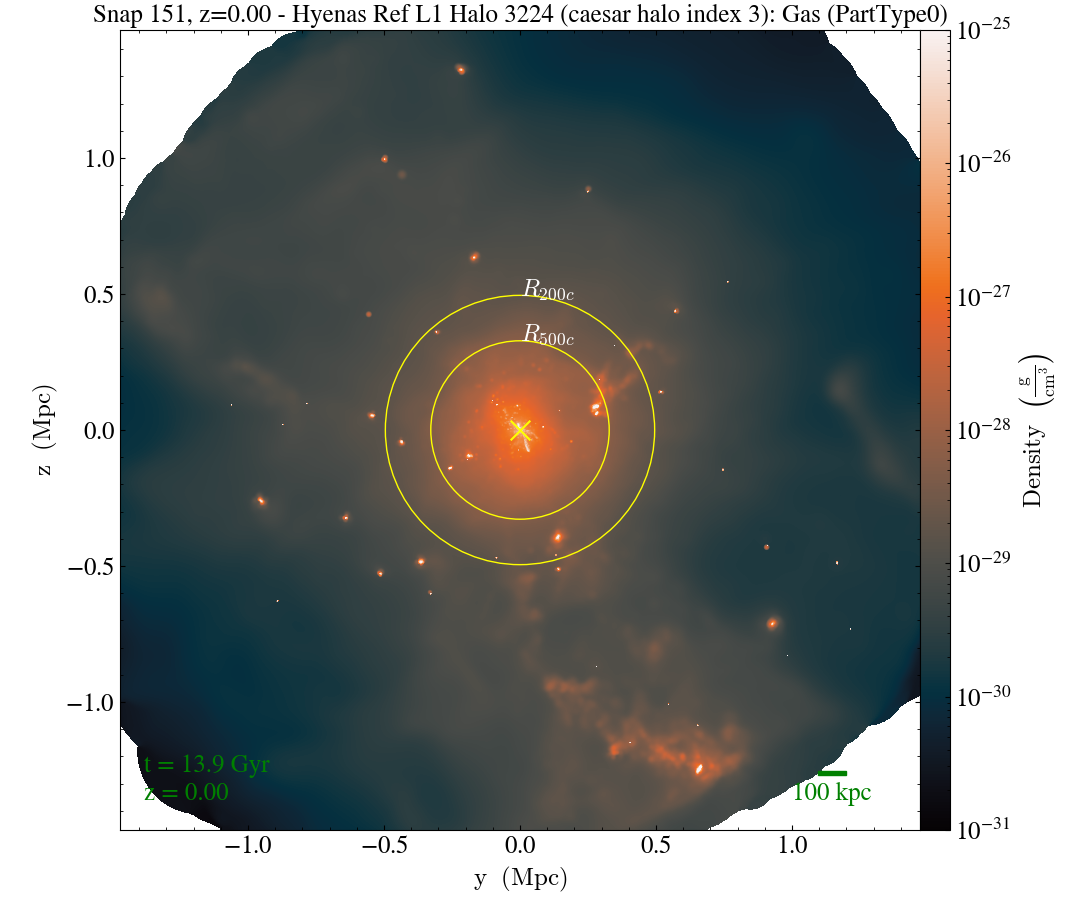

In [272]:
px_sphere_gas.set_cmap(('gas', 'density'), 'cmyt.dusk')
px_sphere_gas.set_zlim(('gas', 'density'), zmin=(1e-31, 'g/cm**3'), zmax=(1e-25, 'g/cm**3'))
# px_sphere_gas.set_zlim(('gas', 'density'), zmin=(1e-6, 'g/cm**2'), zmax=(1e-1, 'g/cm**2'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# ax = px_sphere_gas.plots['gas', 'density'].axes
# ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# fig = px_sphere_gas.plots['gas', 'density'].figure
# new_ax = fig.add_axes((0,0,1,1))
# new_ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

# ax = px_sphere_gas.plots['gas', 'density'].axes
# ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

In [25]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'temperature')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-15 11:27:32,850 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 11:27:32,850 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 11:27:32,855 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 11:27:32,855 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 11:27:32,869 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2025-08-15 11:27:44,002 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-15 11:27:50,090 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800
yt : [INFO     ] 2025-08-15 11:27:57,432 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



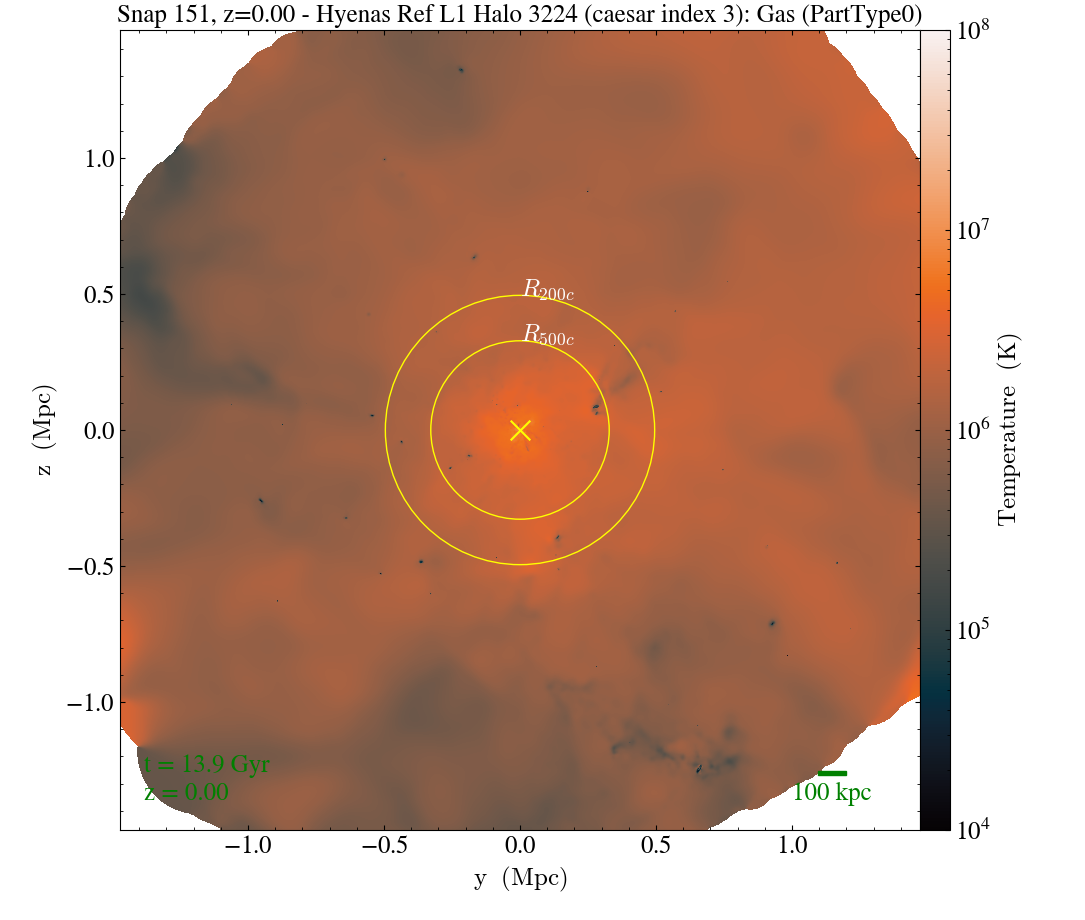

In [26]:
px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')
px_sphere_gas.set_zlim(('gas', 'temperature'), zmin=(1e4, 'K'), zmax=(1e8, 'K'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar index {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [296]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'entropy')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 01:48:49,513 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:48:49,513 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:48:49,516 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:48:49,516 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:48:49,517 Making a fixed resolution buffer of (('gas', 'entropy')) 800 by 800
/project/b/babul/aspadawe/pyenvs/visualize_with_yt_ondemand/lib/python3.13/site-packages/unyt/array.py:1972: RuntimeWarning:

divide by zero encountered in power

yt : [INFO     ] 2025-08-13 01:48:58,265 Making a fixed resolution buffer of (('gas', 'emission_measure')) 800 by 800


In [318]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('PartType0', 'El_number_density')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'ones')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 02:12:23,308 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 02:12:23,309 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 02:12:23,311 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 02:12:23,312 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 02:12:23,313 Making a fixed resolution buffer of (('PartType0', 'El_number_density')) 800 by 800
yt : [INFO     ] 2025-08-13 02:12:30,573 Making a fixed resolution buffer of (('gas', 'ones')) 800 by 800


yt : [INFO     ] 2025-08-13 02:12:36,500 Making a fixed resolution buffer of (('PartType0', 'El_number_density')) 800 by 800
yt : [INFO     ] 2025-08-13 02:12:44,718 Making a fixed resolution buffer of (('gas', 'ones')) 800 by 800



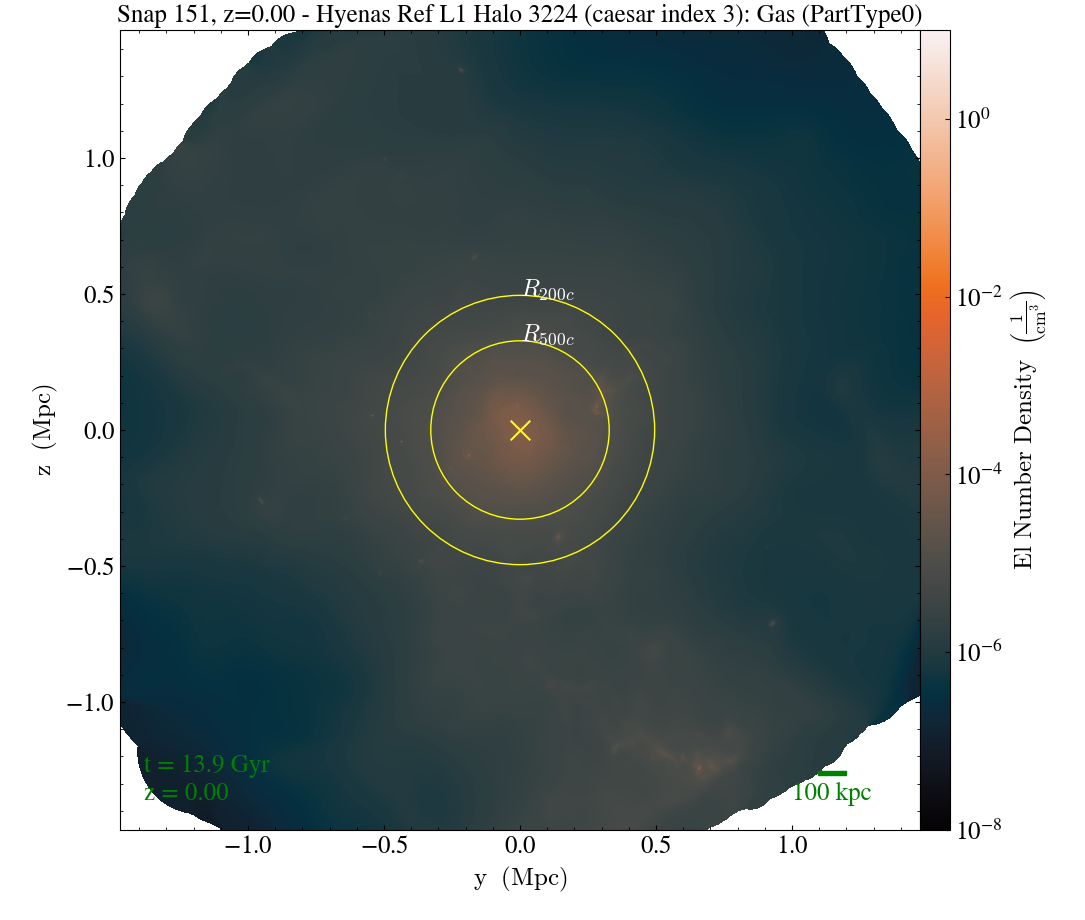

In [319]:
px_sphere_gas.set_cmap(('PartType0', 'El_number_density'), 'cmyt.dusk')
px_sphere_gas.set_zlim(('PartType0', 'El_number_density'), zmin=(1e-8, 'cm**-3'), zmax=(1e1, 'cm**-3'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar index {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

yt : [INFO     ] 2025-08-13 01:49:05,407 Making a fixed resolution buffer of (('gas', 'entropy')) 800 by 800
yt : [INFO     ] 2025-08-13 01:49:15,153 Making a fixed resolution buffer of (('gas', 'emission_measure')) 800 by 800



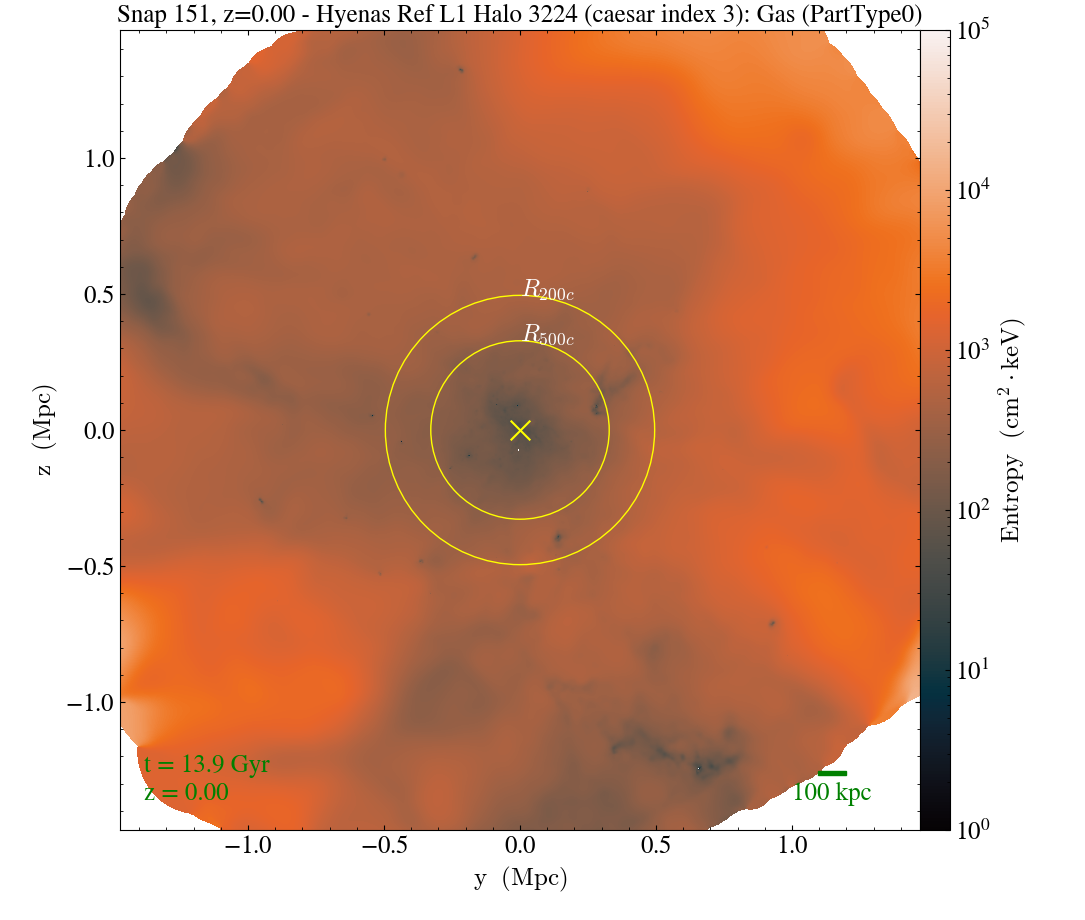

In [297]:
px_sphere_gas.set_cmap(('gas', 'entropy'), 'cmyt.dusk')
px_sphere_gas.set_zlim(('gas', 'entropy'), zmin=(1e0, 'cm**2*keV'), zmax=(1e5, 'cm**2*keV'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar index {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [284]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('PartType0', 'InternalEnergy')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 01:32:00,805 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:32:00,806 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:32:00,808 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:32:00,808 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:32:00,809 Making a fixed resolution buffer of (('PartType0', 'InternalEnergy')) 800 by 800
yt : [INFO     ] 2025-08-13 01:32:06,988 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-13 01:32:12,820 Making a fixed resolution buffer of (('PartType0', 'InternalEnergy')) 800 by 800
yt : [INFO     ] 2025-08-13 01:32:20,267 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



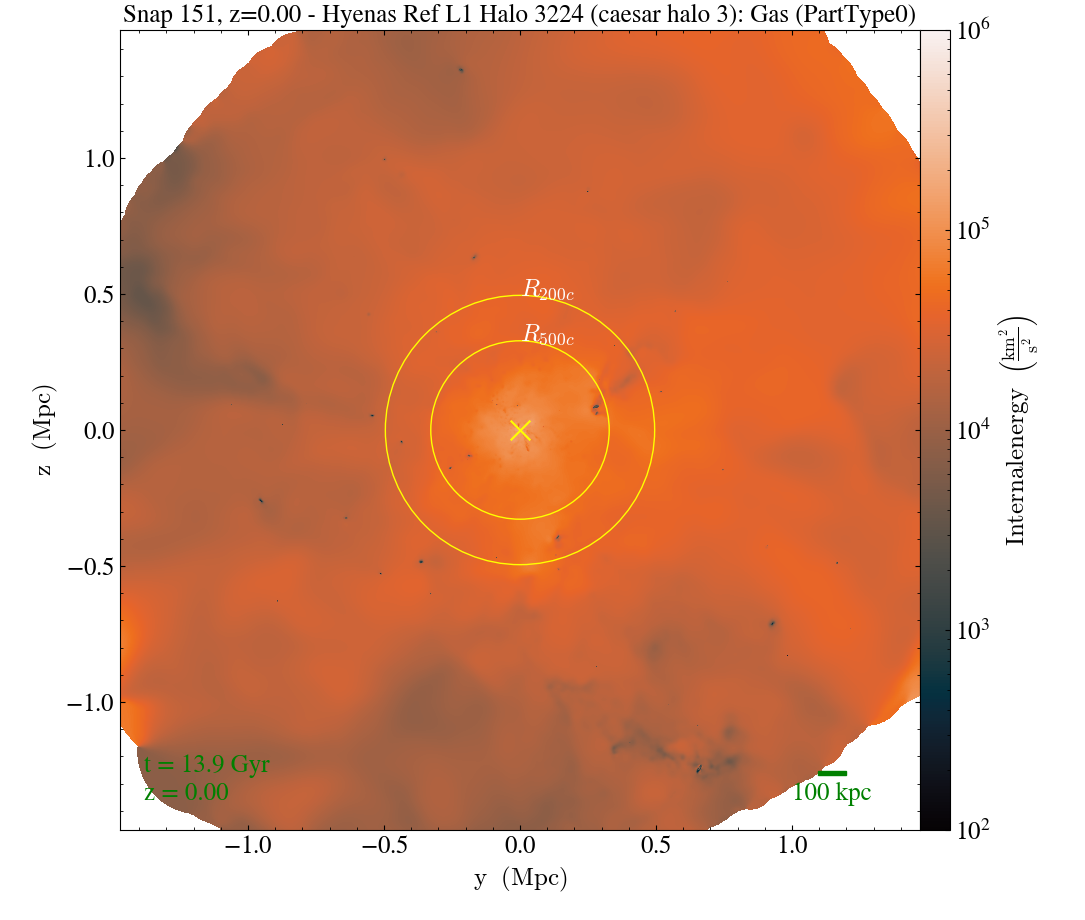

In [285]:
px_sphere_gas.set_cmap(('PartType0', 'InternalEnergy'), 'cmyt.dusk')
px_sphere_gas.set_unit(('PartType0', 'InternalEnergy'), 'km**2/s**2')
px_sphere_gas.set_zlim(('PartType0', 'InternalEnergy'), zmin=(1e2, 'km**2/s**2'), zmax=(1e6, 'km**2/s**2'))
# px_sphere_gas.set_zlim(('gas', 'density'), zmin=(1e-6, 'g/cm**2'), zmax=(1e-1, 'g/cm**2'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# ax = px_sphere_gas.plots['gas', 'density'].axes
# ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# fig = px_sphere_gas.plots['gas', 'density'].figure
# new_ax = fig.add_axes((0,0,1,1))
# new_ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

# ax = px_sphere_gas.plots['gas', 'density'].axes
# ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))

In [273]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'metallicity')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 00:56:42,154 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 00:56:42,155 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 00:56:42,157 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 00:56:42,157 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 00:56:42,158 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2025-08-13 00:56:52,511 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-13 00:56:58,408 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2025-08-13 00:57:06,090 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



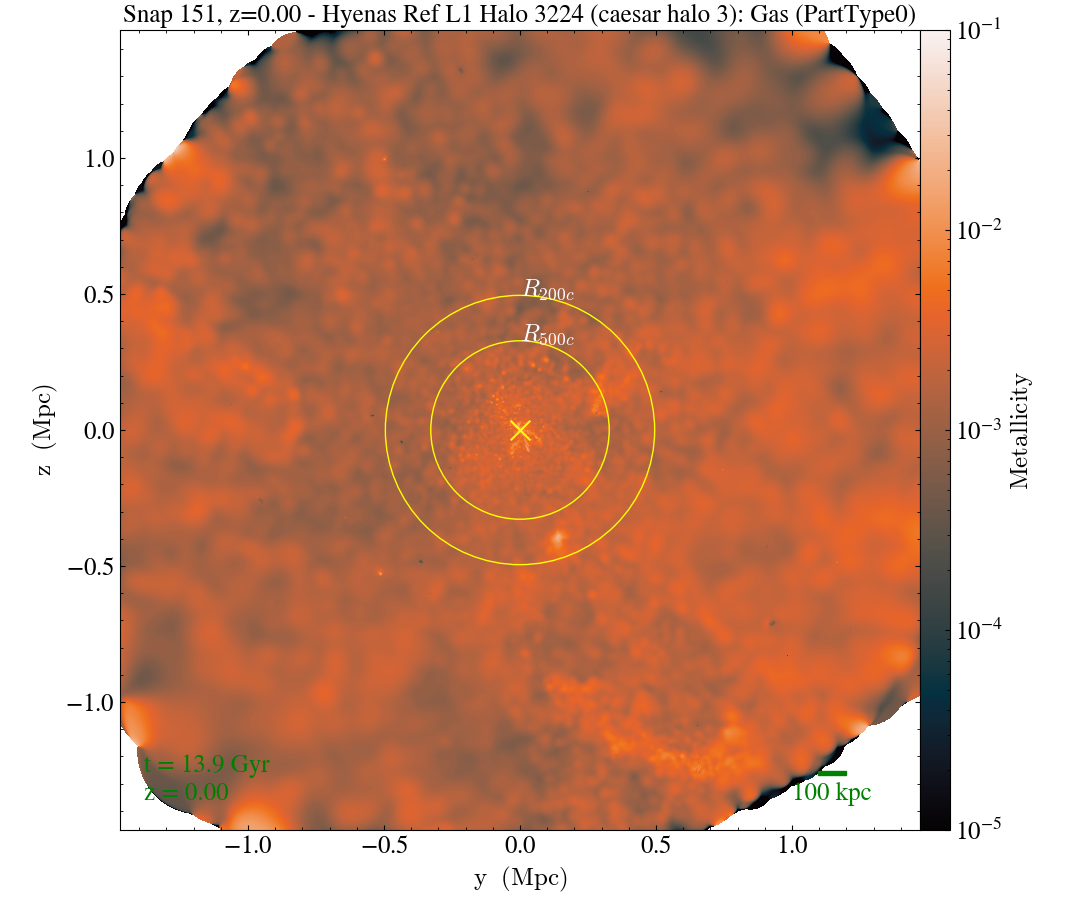

In [274]:
px_sphere_gas.set_cmap(('gas', 'metallicity'), 'cmyt.dusk')
px_sphere_gas.set_zlim(('gas', 'metallicity'), zmin=(1e-5, ''), zmax=(1e-1, ''))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [300]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'velocity_magnitude')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 01:51:38,616 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:51:38,616 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:51:38,619 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:51:38,619 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:51:38,620 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-13 01:51:45,090 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-13 01:51:50,909 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-13 01:51:58,452 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



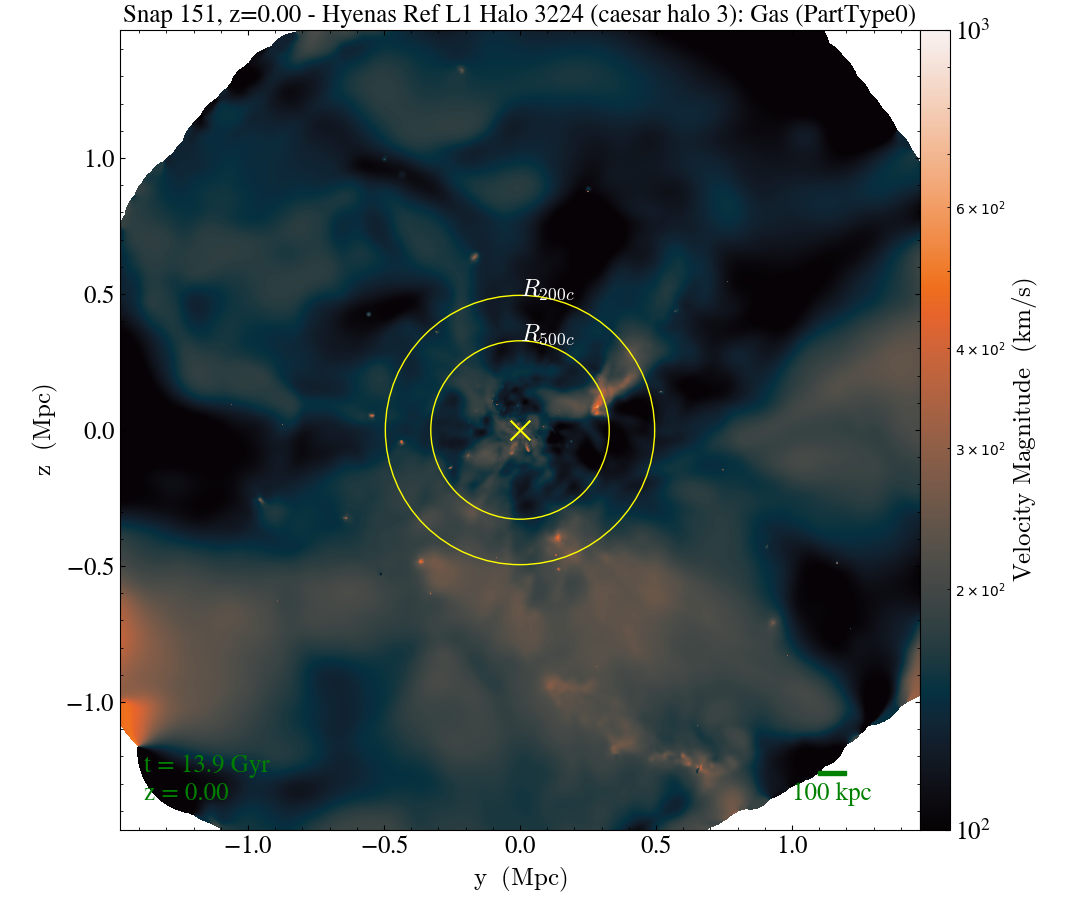

In [301]:
px_sphere_gas.set_cmap(('gas', 'velocity_magnitude'), 'cmyt.dusk')
px_sphere_gas.set_unit(('gas', 'velocity_magnitude'), 'km/s')
px_sphere_gas.set_zlim(('gas', 'velocity_magnitude'), zmin=(1e2, 'km/s'), zmax=(1e3, 'km/s'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [91]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'velocity_magnitude')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  moment=2,
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-15 12:25:12,941 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 12:25:12,941 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 12:25:12,944 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 12:25:12,944 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 12:25:12,945 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-15 12:25:19,354 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-15 12:25:31,528 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-15 12:25:39,005 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



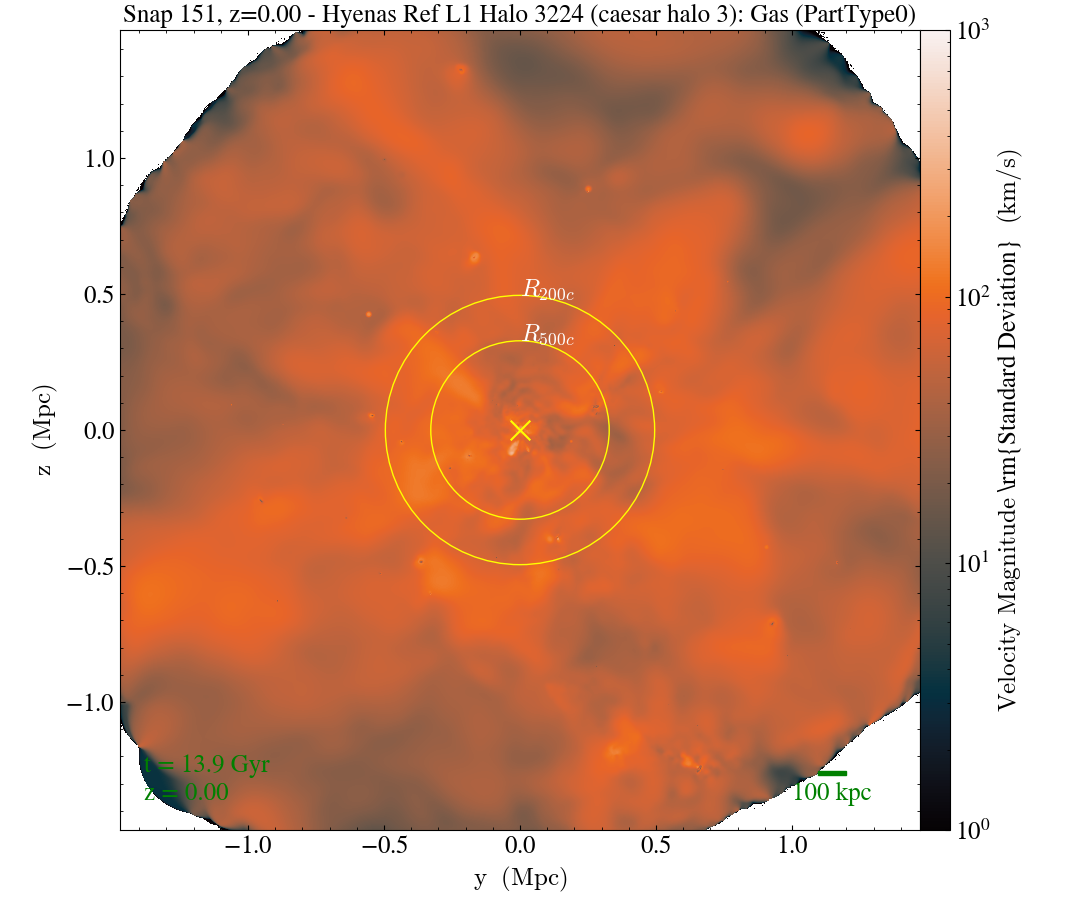

In [92]:
px_sphere_gas.set_cmap(('gas', 'velocity_magnitude'), 'cmyt.dusk')
px_sphere_gas.set_unit(('gas', 'velocity_magnitude'), 'km/s')
px_sphere_gas.set_zlim(('gas', 'velocity_magnitude'), zmin=(1e0, 'km/s'), zmax=(1e3, 'km/s'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [97]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'velocity_x')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  moment=2,
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-15 12:49:13,595 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 12:49:13,595 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 12:49:13,598 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-15 12:49:13,598 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-15 12:49:13,599 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [INFO     ] 2025-08-15 12:49:19,828 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-15 12:49:31,961 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [INFO     ] 2025-08-15 12:49:39,275 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



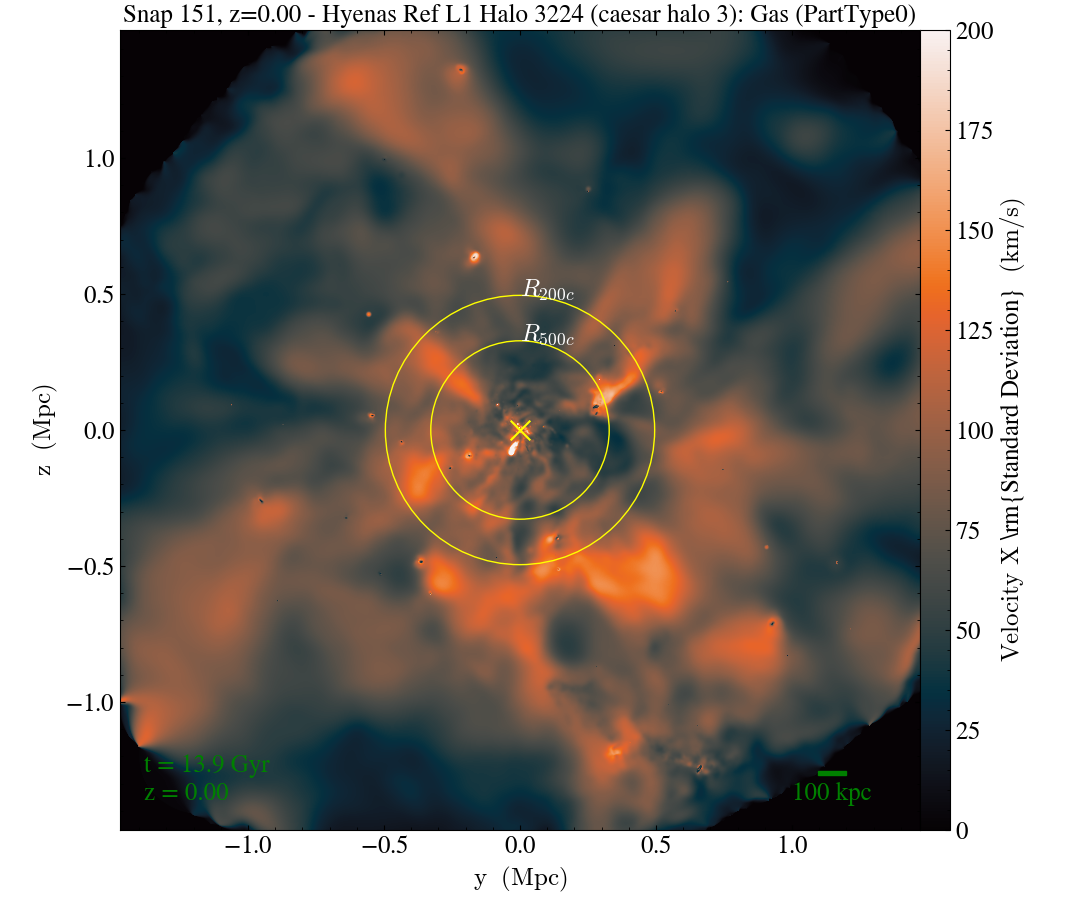

In [98]:
px_sphere_gas.set_cmap(('gas', 'velocity_x'), 'cmyt.dusk')
px_sphere_gas.set_unit(('gas', 'velocity_x'), 'km/s')
px_sphere_gas.set_zlim(('gas', 'velocity_x'), zmin=(0, 'km/s'), zmax=(200, 'km/s'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [290]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('igrm', 'velocity_magnitude')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('igrm', 'density')],# ('gas', 'density')], 
                                  moment=2,
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-15 15:52:03,871 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-15 15:52:03,872 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-15 15:52:03,874 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-15 15:52:03,874 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-15 15:52:03,875 Making a fixed resolution buffer of (('igrm', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-15 15:52:34,362 Making a fixed resolution buffer of (('igrm', 'density')) 800 by 800


yt : [INFO     ] 2025-08-15 15:53:31,314 Making a fixed resolution buffer of (('igrm', 'velocity_magnitude')) 800 by 800
yt : [INFO     ] 2025-08-15 15:54:02,721 Making a fixed resolution buffer of (('igrm', 'density')) 800 by 800



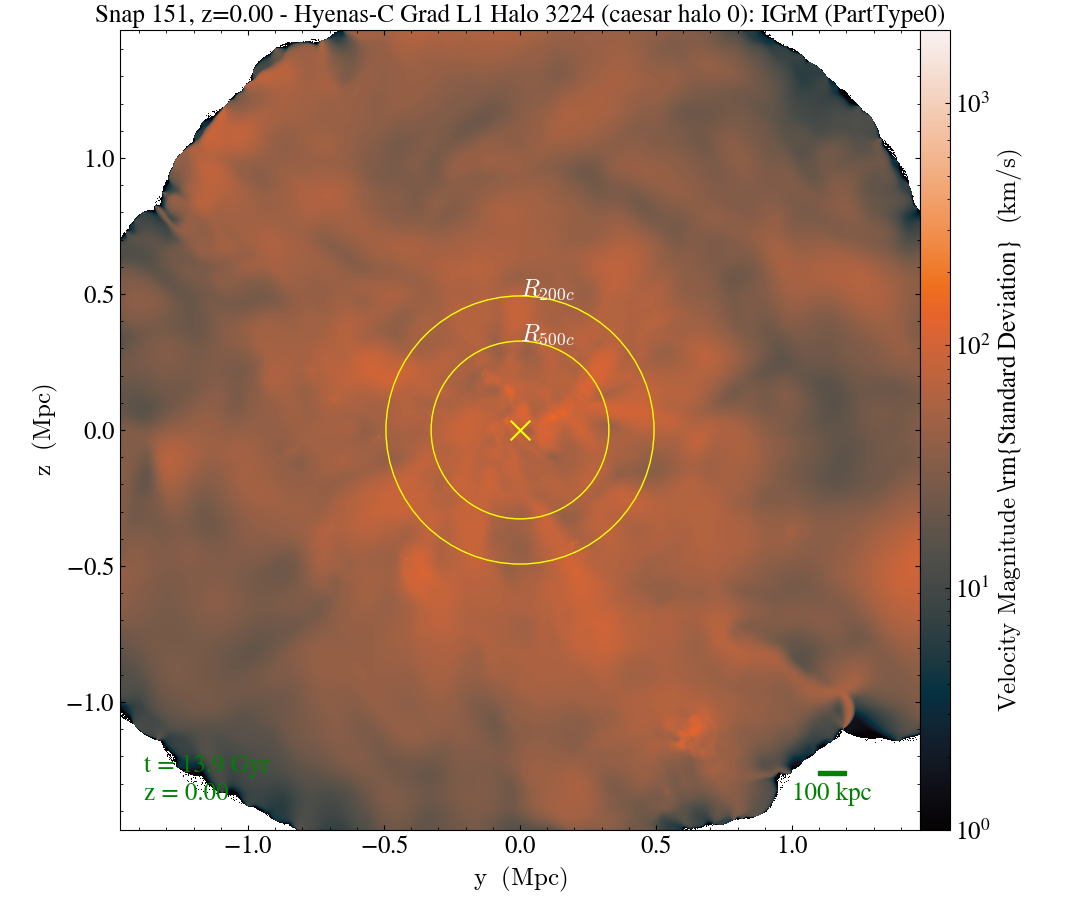

In [291]:
px_sphere_gas.set_cmap(('igrm', 'velocity_magnitude'), 'cmyt.dusk')
px_sphere_gas.set_unit(('igrm', 'velocity_magnitude'), 'km/s')
px_sphere_gas.set_zlim(('igrm', 'velocity_magnitude'), zmin=(1e0, 'km/s'), zmax=(2e3, 'km/s'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): IGrM (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [292]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('igrm', 'velocity_x')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('igrm', 'density')],# ('gas', 'density')], 
                                  moment=2,
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-15 15:55:01,984 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-15 15:55:01,985 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-15 15:55:01,988 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-15 15:55:01,989 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-15 15:55:01,990 Making a fixed resolution buffer of (('igrm', 'velocity_x')) 800 by 800
yt : [INFO     ] 2025-08-15 15:55:32,487 Making a fixed resolution buffer of (('igrm', 'density')) 800 by 800


yt : [INFO     ] 2025-08-15 15:56:29,321 Making a fixed resolution buffer of (('igrm', 'velocity_x')) 800 by 800
yt : [INFO     ] 2025-08-15 15:57:00,664 Making a fixed resolution buffer of (('igrm', 'density')) 800 by 800



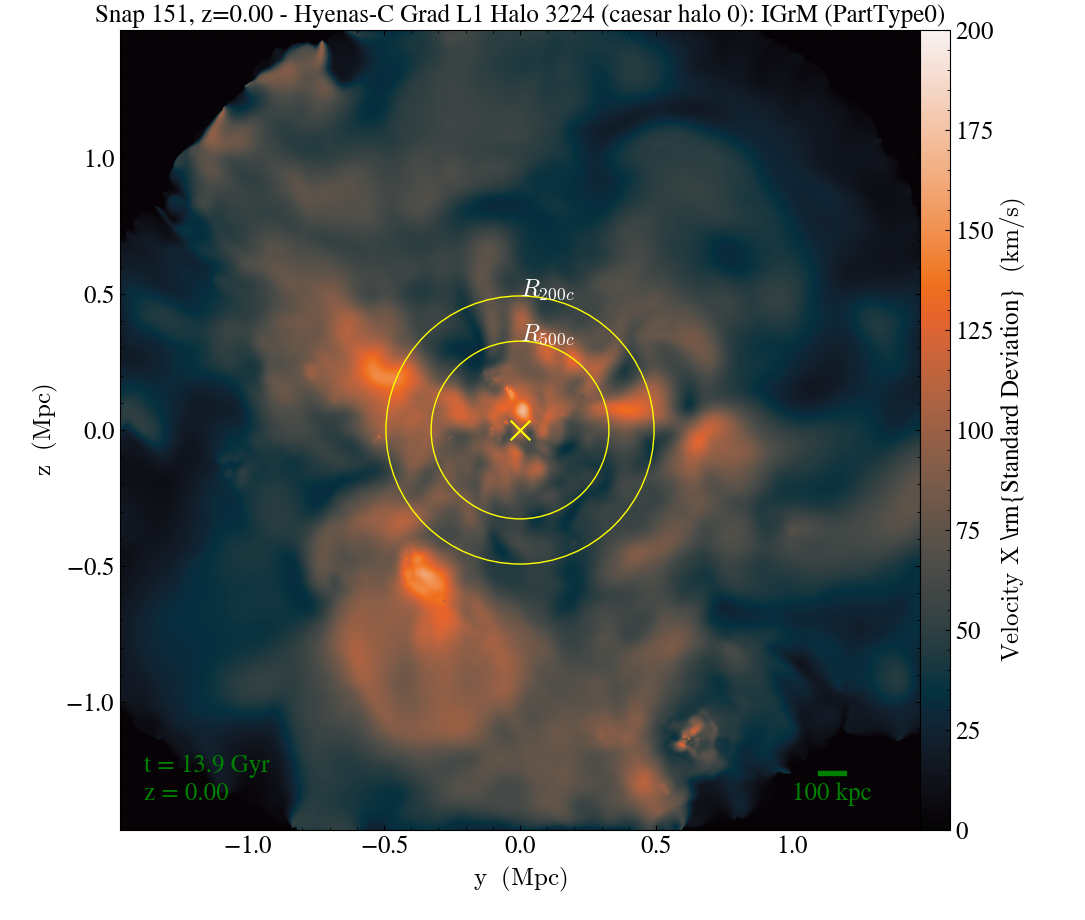

In [293]:
px_sphere_gas.set_cmap(('igrm', 'velocity_x'), 'cmyt.dusk')
px_sphere_gas.set_unit(('igrm', 'velocity_x'), 'km/s')
px_sphere_gas.set_zlim(('igrm', 'velocity_x'), zmin=(0, 'km/s'), zmax=(200, 'km/s'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): IGrM (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [304]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'kinetic_energy_density')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 01:54:46,310 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:54:46,310 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:54:46,313 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:54:46,313 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:54:46,315 Making a fixed resolution buffer of (('gas', 'kinetic_energy_density')) 800 by 800
yt : [INFO     ] 2025-08-13 01:54:52,776 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2025-08-13 01:54:58,711 Making a fixed resolution buffer of (('gas', 'kinetic_energy_density')) 800 by 800
yt : [INFO     ] 2025-08-13 01:55:06,294 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



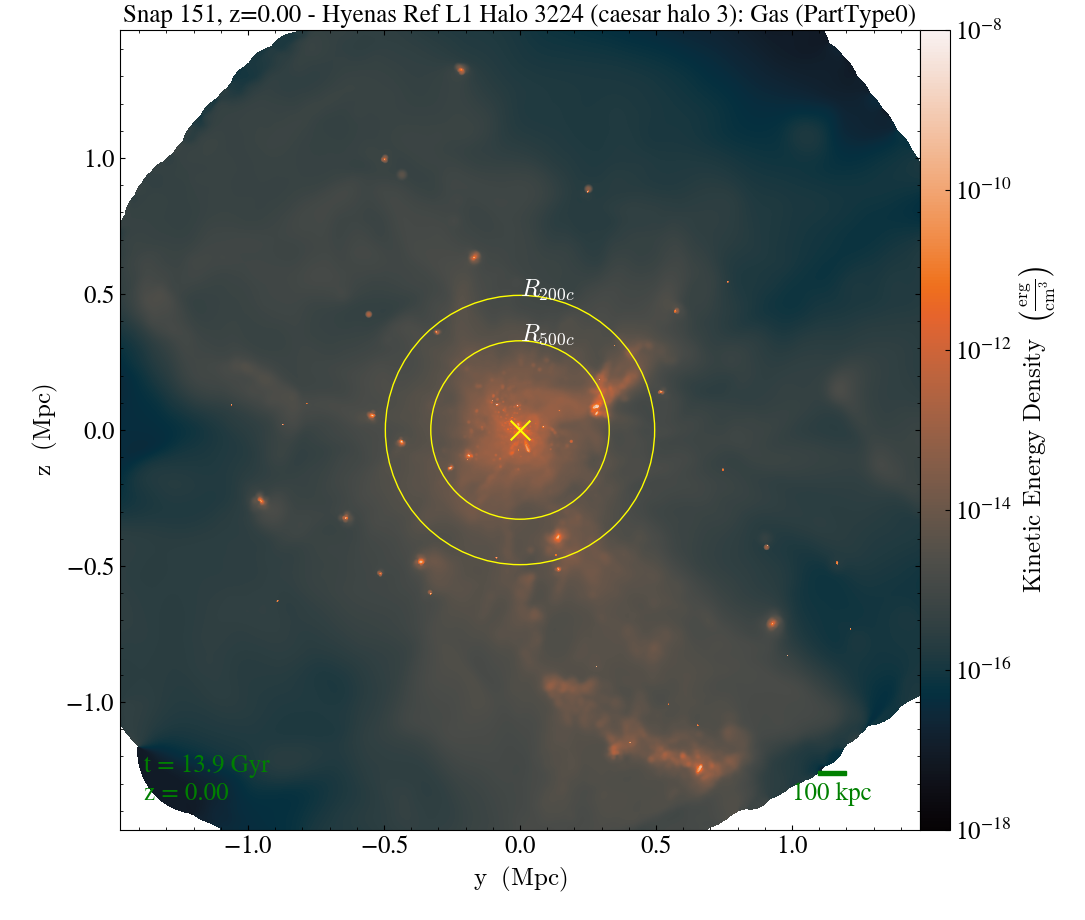

In [305]:
px_sphere_gas.set_cmap(('gas', 'kinetic_energy_density'), 'cmyt.dusk')
px_sphere_gas.set_unit(('gas', 'kinetic_energy_density'), 'erg/cm**3')
px_sphere_gas.set_zlim(('gas', 'kinetic_energy_density'), zmin=(1e-18, 'erg/cm**3'), zmax=(1e-8, 'erg/cm**3'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [312]:
px_sphere_gas = yt.ProjectionPlot(snap, 'x', 
                      [('PartType0', 'StarFormationRate')], #('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'ones')],# ('gas', 'density')], 
                                  data_source=sphere,
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-08-13 01:59:34,321 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:59:34,322 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:59:34,324 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-08-13 01:59:34,325 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-08-13 01:59:34,326 Making a fixed resolution buffer of (('PartType0', 'StarFormationRate')) 800 by 800
yt : [INFO     ] 2025-08-13 01:59:40,524 Making a fixed resolution buffer of (('gas', 'ones')) 800 by 800


yt : [INFO     ] 2025-08-13 01:59:46,224 Making a fixed resolution buffer of (('PartType0', 'StarFormationRate')) 800 by 800
yt : [INFO     ] 2025-08-13 01:59:53,451 Making a fixed resolution buffer of (('gas', 'ones')) 800 by 800



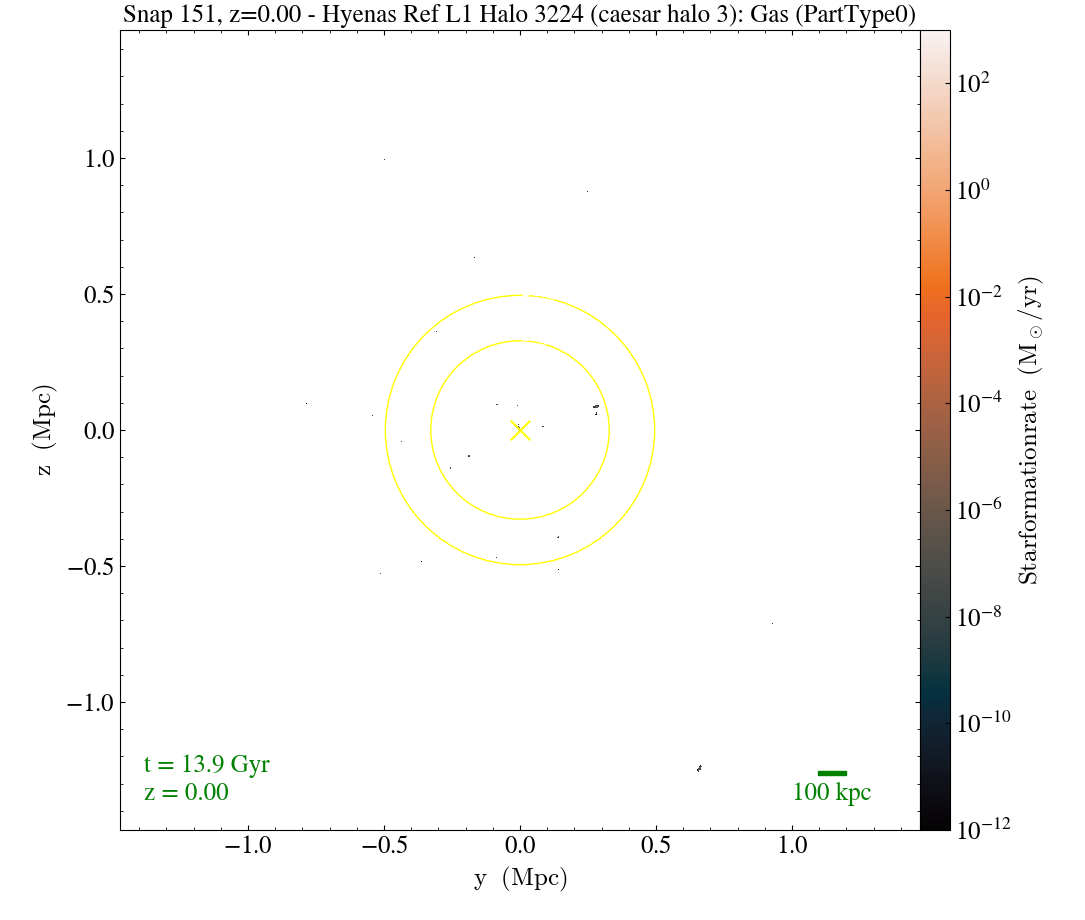

In [313]:
px_sphere_gas.set_cmap(('PartType0', 'StarFormationRate'), 'cmyt.dusk')
# px_sphere_gas.set_unit(('PartType0', 'StarFormationRate'), 'erg/cm**3')
# px_sphere_gas.set_zlim(('PartType0', 'StarFormationRate'), zmin=(1e-12, 'Msun/yr'), zmax=(1e3, 'Msun/yr'))

# px_sphere_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

px_sphere_gas.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo {specific_halo_index}): Gas (PartType0)')
px_sphere_gas.zoom(100)
# px_sphere_gas.annotate_velocity()
px_sphere_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_sphere_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_sphere_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_sphere_gas.annotate_timestamp(time=True, redshift=True, text_args={'color':'green'})
px_sphere_gas.annotate_scale(size_bar_args={'color':'green'})

# px_sphere_gas.set_background_color(('gas', 'temperature'), color='white')

In [ ]:
px_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'density'), ('gas', 'temperature')], #('gas', 'metallicity'), ('gas', 'velocity_magnitude')], 
                      weight_field=[('gas', 'density'), ('gas', 'density')],
                           center=specific_halo_pos)#, origin='native')

In [169]:
px_gas = yt.ProjectionPlot(snap, 'x', 
                      [('gas', 'metallicity')], 
                      weight_field=[('gas', 'density')],
                           center=specific_halo_pos)#, origin='native')

yt : [INFO     ] 2025-03-24 17:48:31,920 xlim = -532.132812 199467.867188
yt : [INFO     ] 2025-03-24 17:48:31,921 ylim = -3418.203125 196581.796875
yt : [INFO     ] 2025-03-24 17:48:31,924 xlim = -532.132812 199467.867188
yt : [INFO     ] 2025-03-24 17:48:31,925 ylim = -3418.203125 196581.796875
yt : [INFO     ] 2025-03-24 17:48:31,926 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800
yt : [INFO     ] 2025-03-24 17:50:31,249 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


In [ ]:
## Colormap
# p.set_cmap(('gas', 'density'), 'cmyt.pastel')
px_gas.set_cmap(('gas', 'density'), 'cmyt.dusk')
# p.set_cmap(('gas', 'density'), 'CMRmap')
# p.set_cmap(('gas', 'density'), 'STD GAMMA-II')
# p.set_cmap(('gas', 'density'), 'jet')
# p.set_cmap(('gas', 'density'), 'turbo')
# p.set_cmap(('gas', 'density'), 'octarine')

px_gas.set_cmap(('gas', 'temperature'), 'cmyt.dusk')

# px_gas.set_cmap(('gas', 'metallicity'), 'cmyt.dusk')

# px_gas.set_cmap(('gas', 'velocity_magnitude'), 'cmyt.dusk')


px_gas.annotate_title(f'{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): Gas')
px_gas.zoom(100)
px_gas.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'yellow'})
px_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data')
px_gas.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'yellow'})
px_gas.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data')
px_gas.annotate_timestamp(time=True, redshift=True)
px_gas.annotate_scale()


## Colorbar scaling
# px.set_zlim(('gas', 'density'), zmin=(1e-40, 'g/cm**3'), zmax=(5e-25, 'g/cm**3'))



# nicen up the plot by setting the background color to the minimum of the colorbar
# p.set_background_color(("gas", "density"))


## Change the resolution
# vary the buff_size -- the number of resolution elements in the actual visualization
# set it to 2000x2000
# buff_size = 2000
# p.set_buff_size(1000)


# set the figure size in inches
# figure_size = 10
# p.set_figure_size(figure_size)

# p.show()

In [ ]:
px_gas.zoom(2)

In [245]:
from mpl_toolkits.axes_grid1 import AxesGrid

In [ ]:
fig = plt.figure
grid = AxesGrid(
    fig,
    (0.075, 0.075, 0.85, 0.85),
    nrows_ncols=(2, 2),
    axes_pad=1.0,
    label_mode="1",
    share_all=True,
    cbar_location="right",
    cbar_mode="each",
    cbar_size="3%",
    cbar_pad="0%",
)

In [252]:
fig = px_sphere_gas.plots['gas', 'density'].figure
new_ax = fig.add_axes((0,0,1,1))
new_ax.add_patch(Rectangle((0,0), 1, 1, fill=False, hatch='xx'))
plt.show()

In [ ]:
px_sphere_gas.set_zlim(('gas', 'density'), zmin=(1e-30, 'g/cm**3'), zmax=(5e-26, 'g/cm**3'))

In [ ]:
px_gas.clear_annotations()

In [ ]:
px.annotate_velocity()

In [ ]:
px.annotate_particles(width=(5, 'Mpc'))

In [ ]:
px_gas_sphere = snap.sphere(px.data_source.center, snap.quan(2, 'Mpc'))

In [ ]:
px.annotate_particles(width=(10, 'Mpc'), data_source=px_gas_sphere)

## Stars

In [270]:
px_sphere_stars = yt.ParticlePlot(snap, ('PartType4', 'particle_position_y'), ('PartType4', 'particle_position_z'),
                           ('PartType4', 'particle_mass'), data_source=sphere,#)
                           density=True, center=specific_halo_pos)
#                            weight_field=('PartType4', 'metallicity'))

yt : [INFO     ] 2025-08-10 18:38:52,128 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:38:52,129 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:38:52,132 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:38:52,132 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:38:52,133 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



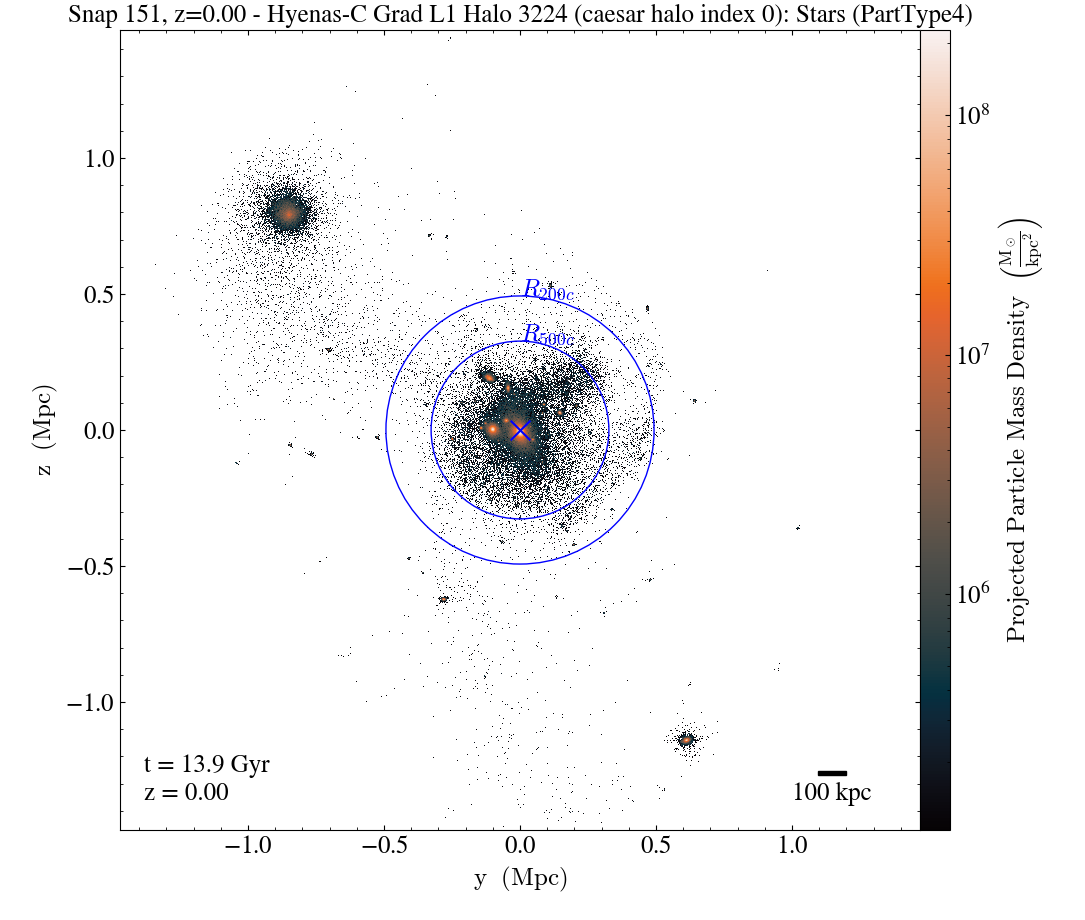

In [271]:
px_sphere_stars.set_cmap(('PartType4', 'particle_mass'), 'cmyt.dusk')
# px_sphere_stars.set_unit(('PartType4', 'particle_mass'), 'Msun')
px_sphere_stars.set_unit(('PartType4', 'particle_mass'), 'Msun/kpc**2')
px_sphere_stars.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): Stars (PartType4)')
px_sphere_stars.zoom(100)
px_sphere_stars.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_sphere_stars.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_sphere_stars.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_stars.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_sphere_stars.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_stars.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_sphere_stars.annotate_scale(size_bar_args={'color':'black'})

In [182]:
px_stars = yt.ParticlePlot(snap, ('PartType4', 'particle_position_y'), ('PartType4', 'particle_position_z'),
                           ('PartType4', 'particle_mass'),#)
                           density=True, center=specific_halo_pos)
#                            weight_field=('PartType4', 'metallicity'))

yt : [INFO     ] 2025-05-08 16:32:39,268 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-05-08 16:32:39,269 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-05-08 16:32:39,271 xlim = -3609.960938 196390.039062
yt : [INFO     ] 2025-05-08 16:32:39,272 ylim = -2160.171875 197839.828125
yt : [INFO     ] 2025-05-08 16:32:39,273 Splatting (('PartType4', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



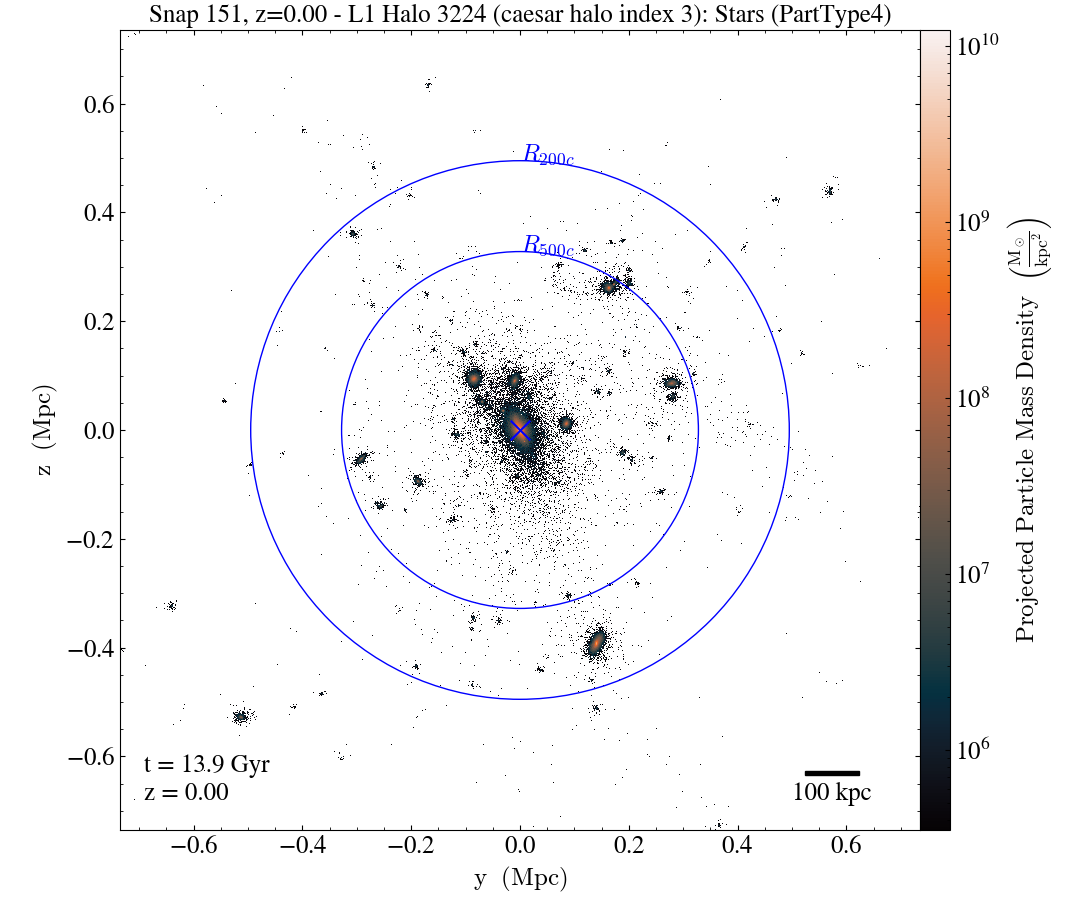

In [183]:
px_stars.set_cmap(('PartType4', 'particle_mass'), 'cmyt.dusk')
# px_stars.set_unit(('PartType4', 'particle_mass'), 'Msun')
px_stars.set_unit(('PartType4', 'particle_mass'), 'Msun/kpc**2')
px_stars.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): Stars (PartType4)')
px_stars.zoom(200)
px_stars.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_stars.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_stars.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_stars.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_stars.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_stars.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_stars.annotate_scale(size_bar_args={'color':'black'})

In [ ]:
# px_stars.set_unit(('PartType4', 'particle_mass'), 'Msun')
px_stars.set_unit(('PartType4', 'particle_mass'), 'Msun/kpc**2')

In [ ]:
px_stars.zoom(4)

## Black Holes

In [272]:
px_sphere_bhs = yt.ParticlePlot(snap, ('PartType5', 'particle_position_y'), ('PartType5', 'particle_position_z'),
                           ('PartType5', 'BH_Mass'), data_source=sphere,#)
                           density=False, center=specific_halo_pos)
#                            weight_field=('PartType4', 'metallicity'))

yt : [INFO     ] 2025-08-10 18:39:17,117 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:17,118 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:17,120 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:17,121 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:17,122 Splatting (('PartType5', 'BH_Mass')) onto a 800 by 800 mesh using method 'ngp'



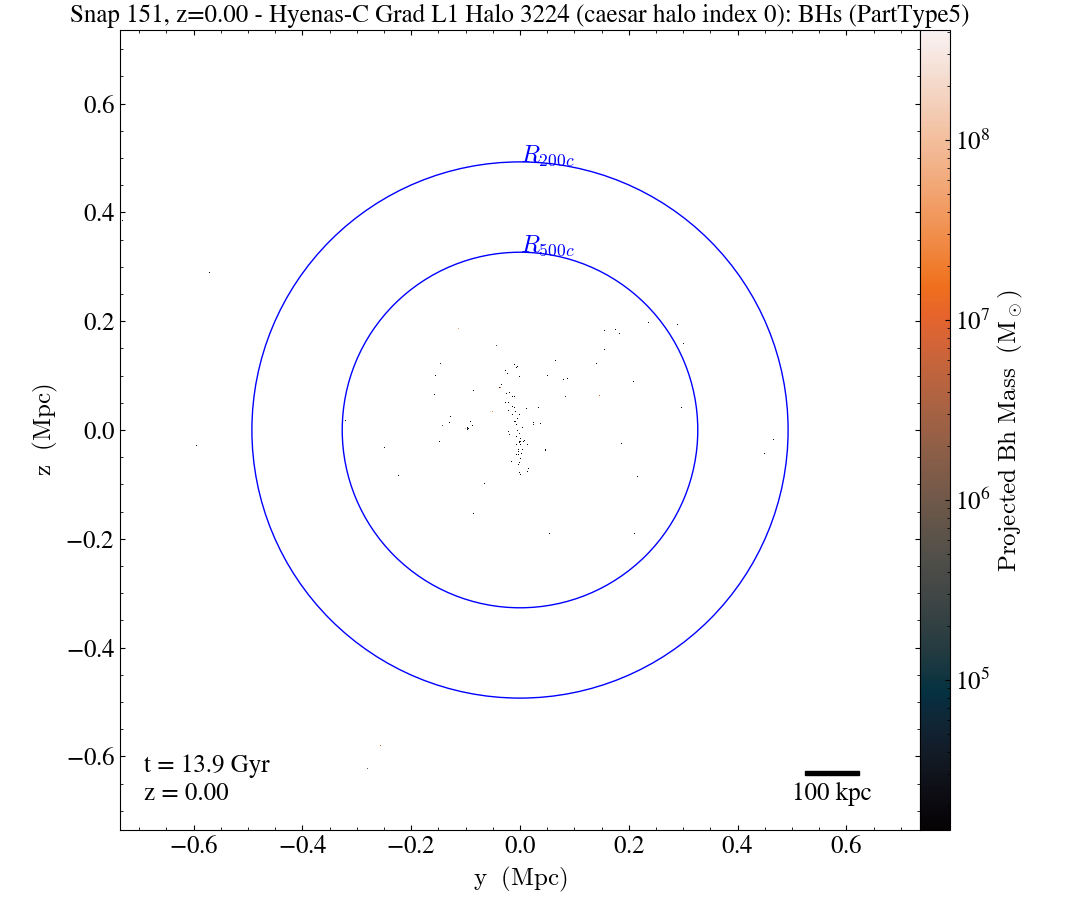

In [273]:
px_sphere_bhs.set_cmap(('PartType5', 'BH_Mass'), 'cmyt.dusk')
px_sphere_bhs.set_unit(('PartType5', 'BH_Mass'), 'Msun')
# px_sphere_bhs.set_unit(('PartType5', 'BH_Mass'), 'Msun/kpc**2')

# px_sphere_bhs.annotate_particles((1, 'Mpc'))
# px_sphere_bhs.set_markersize(10)
px_sphere_bhs.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): BHs (PartType5)')
px_sphere_bhs.zoom(200)
# px_sphere_bhs.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_sphere_bhs.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_sphere_bhs.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_bhs.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_sphere_bhs.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_bhs.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_sphere_bhs.annotate_scale(size_bar_args={'color':'black'})

In [148]:
# %matplotlib
# plt.ion()

In [149]:
# %matplotlib notebook

In [150]:
# plt.ioff()

In [278]:
prop1 = np.log10(sphere['PartType5', 'BH_Mass'].in_units('Msun').value)
prop1_label = r'$\log(M_{\mathrm{BH}}/\mathrm{M_{\odot}})$'
prop1_simple_label = 'M_BH'

In [279]:
prop1

array([4.16749109, 4.16749109, 6.91238533, 4.16749109, 4.16749109,
       4.27923571, 4.16749109, 4.16820222, 7.3516814 , 4.16749109,
       4.16749109, 4.16749109, 4.16749109, 4.16749109, 4.35801004,
       4.17056063, 7.95260284, 7.49724317, 4.17043138, 4.16749109,
       4.16749109, 4.64461236, 4.16749109, 4.16749109, 5.0753229 ,
       4.16749109, 4.16749109, 4.16749109, 4.16749109, 4.16749109,
       4.46852108, 4.16749109, 4.46852108, 4.16749109, 4.16788821,
       6.07753931, 4.16749109, 4.16749109, 4.16749109, 4.16749109,
       4.16749109, 4.5093223 , 4.16749109, 4.16749109, 4.16749109,
       4.16749109, 4.16749109, 4.16749109, 4.16749109, 4.16749109,
       4.86646108, 4.16749109, 4.16749109, 4.16749109, 4.77001706,
       8.61278281, 4.46852108, 4.16749109, 5.01258913, 4.16749109,
       5.51806202, 8.9215456 , 4.16749109, 4.16749109, 4.16749109,
       4.16752259, 4.16749109, 4.16749109, 4.16749109, 4.16749109,
       4.16749109, 4.16749109, 4.16749109, 4.16749109, 4.16749

In [297]:
# prop2 = sphere['PartType5', 'particle_radius'].in_units('kpc').value
# prop2_label = r'$R\,[\mathrm{kpc}]$'
# prop2_simple_label = 'R'

# prop2 = sphere['PartType5', 'particle_velocity'].in_units('km/s').value
# prop2_label = r'$v_{\mathrm{BH}}\,[\mathrm{km/s}]$'
# prop2_simple_label = 'v'

# prop2 = sphere['PartType5', 'particle_radial_velocity'].in_units('km/s').value
# prop2_label = r'$v_{r,\mathrm{BH}}\,[\mathrm{km/s}]$'
# prop2_simple_label = 'v_r'

# prop2 = sphere['PartType5', 'particle_velocity_magnitude'].in_units('km/s').value
# prop2_label = r'$|v_{\mathrm{BH}}|\,[\mathrm{km/s}]$'
# prop2_simple_label = '|v|'

# prop2 = np.log10(sphere['PartType5', 'BH_Mdot'].in_units('Msun/yr').value)
# prop2_label = r'$\log(\dot{M}_{\mathrm{BH}}\,[\mathrm{M_{\odot}/yr}])$'
# prop2_simple_label = 'log(dM_BH/dt)'

prop2 = sphere['PartType5', 'BH_Mdot'].in_units('Msun/yr').value
prop2_label = r'$\dot{M}_{\mathrm{BH}}\,[\mathrm{M_{\odot}/yr}]$'
prop2_simple_label = 'dM_BH/dt'

In [298]:
prop2

array([3.34209046e-15, 0.00000000e+00, 9.70788415e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.77700362e-04, 4.99996837e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.55435629e-06, 0.00000000e+00,
       2.24520152e-05, 1.25086761e-03, 3.08670795e-06, 0.00000000e+00,
       0.00000000e+00, 2.14035658e-14, 2.90114530e-15, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.38035039e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.19616325e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.92334145e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.99124138e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [299]:
def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):
    """
    Plots the string *s* on the Axes *ax*, with position *xyz*, size *size*,
    and rotation angle *angle*. *zdir* gives the axis which is to be treated as
    the third dimension. *usetex* is a boolean indicating whether the string
    should be run through a LaTeX subprocess or not.  Any additional keyword
    arguments are forwarded to `.transform_path`.

    Note: zdir affects the interpretation of xyz.
    """
    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "x":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

[4.16749109 5.75217593 7.33686076 8.9215456 ]


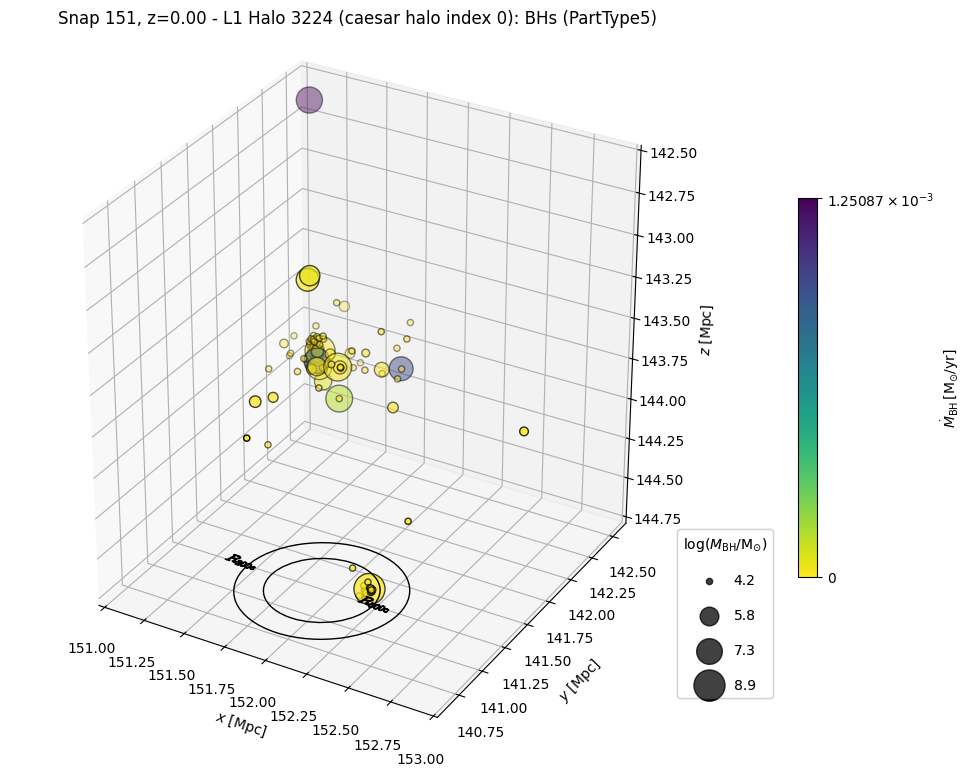

In [301]:
# Create figure and 3D axis
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(projection='3d')

# cmap = 'coolwarm'
cmap = 'viridis_r'

# Normalize size to range (20-500) for visibility
size_min, size_max = 20, 500
sizes = (prop1 - prop1.min()) / np.ptp(prop1) # Normalize 0-1
sizes = sizes * (size_max - size_min) + size_min  # Scale to desired range

# colors = np.log10(bh_masses.in_units('Msun/h'))#/np.log10(max(sphere['PartType5', 'BH_Mass']))
colors = prop2

p = ax.scatter(sphere['PartType5', 'particle_position_x'].in_units('Mpc'),
               sphere['PartType5', 'particle_position_y'].in_units('Mpc'),
               sphere['PartType5', 'particle_position_z'].in_units('Mpc'),
               s=sizes, c=colors, edgecolor='black', cmap=cmap, norm='symlog')#, norm=)

# Add colorbar
cbar = fig.colorbar(mappable=p, ax=ax, pad=0.1, shrink=0.5, # fraction=0.02)
                    label=prop2_label)


# Create size legend
# Select representative size values
size_vals = np.linspace(prop1.min(), prop1.max(), 4)
print(size_vals)
# Calculate corresponding marker sizes
legend_sizes = [(s - prop1.min())/np.ptp(prop1) * (size_max - size_min) + size_min for s in size_vals]
# # Calculate corresponding marker diameters (not sizes) to prevent overlap
# diameters = 2 * np.sqrt(  # Convert area to diameter
#     (size_vals - np.log10(bh_masses).min()) / np.ptp(np.log10(bh_masses)) * 
#     (size_max - size_min) + size_min
# ) / np.pi  # Adjust scaling for legend visibility

# Create dummy plots for legend
legend_points = []
for sz in legend_sizes:
    legend_points.append(ax.scatter([], [], [], s=sz, c='black', edgecolor='k', alpha=0.7))

# Add legend with size labels
size_legend = ax.legend(
    legend_points,
    [f'{val:.1f}' for val in size_vals],
    title=prop1_label,
    loc='center left',
    frameon=True,
    bbox_to_anchor=(0.95, 0.175),  # Position outside plot
    labelspacing=1.5,
    draggable=False,
    # alpha=0.5,
)
ax.add_artist(size_legend)  # Add second legend to plot


ax.set_xlabel(r'$x$ [Mpc]', labelpad=8)
ax.set_ylabel(r'$y$ [Mpc]', labelpad=14)
ax.set_zlabel(r'$z$ [Mpc]', labelpad=16)
ax.set_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): BHs (PartType5)',
             y=1.1)

ax.tick_params(pad=8)

# ax.xaxis.set_inverted(True)
# ax.yaxis.set_inverted(True)
ax.zaxis.set_inverted(True)





# R500 Sphere
# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# x = specific_halo_r500c * np.outer(np.cos(u), np.sin(v)) + specific_halo_minpotpos[0]
# y = specific_halo_r500c * np.outer(np.sin(u), np.sin(v)) + specific_halo_minpotpos[1]
# z = specific_halo_r500c * np.outer(np.ones(np.size(u)), np.cos(v)) + specific_halo_minpotpos[2]

# ax.plot_surface(x, y, z, alpha=0.2, facecolor='white', edgecolor='black')#, rcount=2, ccount=1)

text_height = 145.3, #144, #145.3 #144.4 #143.8

# Draw a circle on the z=0 'floor'
r500c_circle = Circle((specific_halo_minpotpos[0], specific_halo_minpotpos[1]), specific_halo_r500c,
                     color=None, facecolor=None, edgecolor='black', fill=False)
# r500c_circle = Circle((152, 142), 1,
#                      color=None, facecolor=None, edgecolor='black', fill=False)
ax.add_patch(r500c_circle)
art3d.pathpatch_2d_to_3d(r500c_circle, z=text_height, zdir='z')

# Write a Latex formula on the z=0 'floor'
text3d(ax, (specific_halo_minpotpos[0]+0.7*specific_halo_r500c,
            specific_halo_minpotpos[1], text_height), #144.4
       r'$R_{500\mathrm{c}}$',
       zdir='z', size=0.1, usetex=True,
       ec=None, fc='black')


# R200 Sphere
# u = np.linspace(0, 2 * np.pi, 100)
# v = np.linspace(0, np.pi, 100)
# x = specific_halo_r200c * np.outer(np.cos(u), np.sin(v)) + specific_halo_minpotpos[0]
# y = specific_halo_r200c * np.outer(np.sin(u), np.sin(v)) + specific_halo_minpotpos[1]
# z = specific_halo_r200c * np.outer(np.ones(np.size(u)), np.cos(v)) + specific_halo_minpotpos[2]

# ax.plot_surface(x, y, z, alpha=0.2, facecolor='white', edgecolor='black')

# Draw a circle on the z=0 'floor'
r500c_circle = Circle((specific_halo_minpotpos[0], specific_halo_minpotpos[1]), specific_halo_r200c,
                     color=None, facecolor=None, edgecolor='black', fill=False)
# r500c_circle = Circle((152, 142), 1,
#                      color=None, facecolor=None, edgecolor='black', fill=False)
ax.add_patch(r500c_circle)
art3d.pathpatch_2d_to_3d(r500c_circle, z=text_height, zdir='z')

# Write a Latex formula on the z=0 'floor'
text3d(ax, (specific_halo_minpotpos[0]-1.3*specific_halo_r200c,
            specific_halo_minpotpos[1], text_height), #143.8 #144.4
       r'$R_{200\mathrm{c}}$',
       zdir='z', size=0.1, usetex=True,
       ec=None, fc='black')




# # Rotate the axes and update
# for angle in range(0, 360*4 + 1):
#     # Normalize the angle to the range [-180, 180] for display
#     angle_norm = (angle + 180) % 360 - 180

#     # Cycle through a full rotation of elevation, then azimuth, roll, and all
#     elev = azim = roll = 0
#     if angle <= 360:
#         elev = angle_norm
#     elif angle <= 360*2:
#         azim = angle_norm
#     elif angle <= 360*3:
#         roll = angle_norm
#     else:
#         elev = azim = roll = angle_norm

#     # Update the axis view and title
#     ax.view_init(elev, azim, roll)
#     plt.title('Elevation: %d°, Azimuth: %d°, Roll: %d°' % (elev, azim, roll))

#     plt.draw()
#     plt.pause(.001)
#     plt.clf()

# Set an equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

In [302]:
# 3D coordinates
x = sphere['PartType5', 'particle_position_x'].in_units('Mpc')
y = sphere['PartType5', 'particle_position_y'].in_units('Mpc')
z = sphere['PartType5', 'particle_position_z'].in_units('Mpc')

# Property for color (positive and negative values)
color_property = prop2
color_label = prop2_label
color_simple_label = prop2_simple_label

# cmap = 'RdBu_r'
cmap = 'viridis_r'

# Property for size (positive values only, representing magnitude/importance/etc.)
size_property = prop1  # Ensure positive values
size_label = prop1_label
size_simple_label = prop1_simple_label

# Optional: Add data


# Create DataFrame
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'Color_Property': color_property,
    'Size_Property': size_property,
    # 'Category': categories,
})

# Scale sizes for better visualization (Plotly uses pixel sizes)
min_size, max_size = 3, 20
size_scaled = min_size + (size_property - size_property.min()) / (size_property.max() - size_property.min()) * (max_size - min_size)

# # Normalize size to range (20-500) for visibility
# size_min, size_max = 20, 500
# sizes = (prop1 - prop1.min()) / np.ptp(prop1) # Normalize 0-1
# sizes = sizes * (size_max - size_min) + size_min  # Scale to desired range

# Create the main plot
fig = go.Figure()

# Add the main scatter plot
scatter = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=size_scaled,
        color=color_property,
        colorscale=cmap,
        cmin=np.min(color_property),#-np.max(np.abs(color_property)),
        cmax=np.max(color_property),#np.max(np.abs(color_property)),
        colorbar=dict(
            title=color_label,
            # titlepad=10,
            # titleside="right",
            # titlefont=dict(size=12),
            thickness=15,
            len=0.7,
            x=1.02,
        ),
        opacity=0.8,
        line=dict(width=0.5, color='black'),
        sizemode='diameter'
    ),
    hovertemplate='<b>Point Info</b><br>' +
                  'X: %{x:.2f}<br>' +
                  'Y: %{y:.2f}<br>' +
                  'Z: %{z:.2f}<br>' +
                  rf'{color_label}: ' + '%{marker.color:.2f}<br>' +
                  rf'{size_label}: ' + '%{customdata:.2f}<extra></extra>',
    customdata=size_property,
    name='Data Points',
    showlegend=False
)

fig.add_trace(scatter)

# Create size legend with example values
# size_legend_values = [
#     size_property.min(),
#     np.percentile(size_property, 33),
#     np.percentile(size_property, 67),
#     size_property.max()
# ]

size_legend_values = np.linspace(size_property.min(), size_property.max(), 4)

# size_legend_labels = ['Small', 'Medium', 'Large', 'X-Large']

# Add invisible traces for size legend
# for i, (value, label) in enumerate(zip(size_legend_values, size_legend_labels)):
for i, value in enumerate(size_legend_values):
    # Scale the legend size the same way as the main data
    legend_size = min_size + (value - size_property.min()) / (size_property.max() - size_property.min()) * (max_size - min_size)
    
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],  # No actual points
        mode='markers',
        marker=dict(
            size=legend_size,
            color='gray',
            opacity=0.7,
            line=dict(width=0.5, color='black')
        ),
        # name=f'{label} ({value:.1f})',
        name=f'{value:.2f}',
        showlegend=True,
        legendgroup='size_legend',
    ))

# Update layout
fig.update_layout(
    # title='Interactive 3D Scatter Plot<br><sub>Color: Color Property | Size: Size Property</sub>',
    # title=f'Snap {snap_num}, z={snap.current_redshift:.2f} - L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): BHs (PartType5) \n Color: {color_simple_label} | Size: {size_simple_label}',
    title=f'Snap {snap_num}, z={snap.current_redshift:.2f} - L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): BHs (PartType5)'+'<br><sub>Color: '+color_simple_label+ ' | Size: '+size_simple_label+'</sub>',
    # title='hello',
    scene=dict(
        xaxis_title=r'x [Mpc]',
        yaxis_title=r'y [Mpc]', 
        zaxis_title=r'z [Mpc]',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        aspectmode='cube'
    ),
    width=900,
    height=700,
    font=dict(size=12),
    legend=dict(
        title=dict(text=f"{size_label}", font=dict(size=12)),
        x=0.02,
        y=0.98,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.2)',
        borderwidth=1,
    )
)

fig.show()

# # Alternative version using Plotly Express (simpler but less control over legend)
# print("\n" + "="*50)
# print("ALTERNATIVE: Plotly Express Version")
# print("="*50)

# # For Plotly Express, we need to be more creative with the size legend
# fig2 = px.scatter_3d(df, x='X', y='Y', z='Z', 
#                      color='Color_Property',
#                      size='Size_Property',
#                      color_continuous_scale='RdBu_r',
#                      color_continuous_midpoint=0,
#                      title='Interactive 3D Scatter Plot (Plotly Express)<br><sub>Color & Size represent different properties</sub>',
#                      labels={
#                          'Color_Property': 'Color Property',
#                          'Size_Property': 'Size Property'
#                      },
#                      hover_data=['Category'],
#                      size_max=20)  # Maximum size of points

# # Customize the layout
# fig2.update_traces(marker=dict(opacity=0.8, line=dict(width=0.5, color='black')))
# fig2.update_layout(
#     scene=dict(
#         xaxis_title='X Coordinate',
#         yaxis_title='Y Coordinate',
#         zaxis_title='Z Coordinate',
#         camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
#     ),
#     width=900,
#     height=700,
#     font=dict(size=12)
# )

# fig2.show()

# Print information about the properties
print(f"\nData Summary:")
print(f"Color Property range: {color_property.min():.2f} to {color_property.max():.2f}")
print(f"Size Property range: {size_property.min():.2f} to {size_property.max():.2f}")
print(f"Number of points: {n_points}")

# Example of how to use your own data:
"""
# Replace the sample data generation with your actual data:
df = pd.DataFrame({
    'X': your_x_data,
    'Y': your_y_data,
    'Z': your_z_data,
    'Color_Property': your_color_data,  # Can have positive/negative values
    'Size_Property': your_size_data,    # Should be positive values
    # Add any additional columns for hover info
})

# Make sure size_property values are positive
df['Size_Property'] = np.abs(df['Size_Property'])  # or apply your own transformation

# Then use the same plotting code above
"""


Data Summary:
Color Property range: 0.00 to 0.00
Size Property range: 4.17 to 8.92


NameError: name 'n_points' is not defined

In [9]:
# import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd
# from plotly.subplots import make_subplots

# Initialize Plotly for Jupyter
# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)

# Generate sample data
np.random.seed(42)
n_points = 200

# 3D coordinates
x = np.random.randn(n_points)
y = np.random.randn(n_points)
z = np.random.randn(n_points)

# Property for color (positive and negative values)
color_property = np.random.randn(n_points) * 2

# Property for size (positive values only, representing magnitude/importance/etc.)
size_property = np.abs(np.random.randn(n_points)) * 3 + 0.5  # Ensure positive values

# Optional: Add categorical data
categories = np.random.choice(['Group A', 'Group B', 'Group C'], n_points)

# Create DataFrame
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'Color_Property': color_property,
    'Size_Property': size_property,
    'Category': categories
})

# Scale sizes for better visualization (Plotly uses pixel sizes)
min_size, max_size = 3, 20
size_scaled = min_size + (size_property - size_property.min()) / (size_property.max() - size_property.min()) * (max_size - min_size)

# Create the main plot
fig = go.Figure()

# Add the main scatter plot
scatter = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=size_scaled,
        color=color_property,
        colorscale='RdBu_r',
        cmin=-np.max(np.abs(color_property)),
        cmax=np.max(np.abs(color_property)),
        colorbar=dict(
            title="Color Property",
            # titleside="right",
            # titlefont=dict(size=12),
            thickness=15,
            len=0.7,
            x=1.02
        ),
        opacity=0.8,
        line=dict(width=0.5, color='black'),
        sizemode='diameter'
    ),
    hovertemplate='<b>Point Info</b><br>' +
                  'X: %{x:.2f}<br>' +
                  'Y: %{y:.2f}<br>' +
                  'Z: %{z:.2f}<br>' +
                  'Color Prop: %{marker.color:.2f}<br>' +
                  'Size Prop: %{customdata:.2f}<extra></extra>',
    customdata=size_property,
    name='Data Points',
    showlegend=False
)

fig.add_trace(scatter)

# Create size legend with example values
size_legend_values = [
    size_property.min(),
    np.percentile(size_property, 33),
    np.percentile(size_property, 67),
    size_property.max()
]

size_legend_labels = ['Small', 'Medium', 'Large', 'X-Large']

# Add invisible traces for size legend
for i, (value, label) in enumerate(zip(size_legend_values, size_legend_labels)):
    # Scale the legend size the same way as the main data
    legend_size = min_size + (value - size_property.min()) / (size_property.max() - size_property.min()) * (max_size - min_size)
    
    fig.add_trace(go.Scatter3d(
        x=[None], y=[None], z=[None],  # No actual points
        mode='markers',
        marker=dict(
            size=legend_size,
            color='gray',
            opacity=0.7,
            line=dict(width=0.5, color='black')
        ),
        name=f'{label} ({value:.1f})',
        showlegend=True,
        legendgroup='size_legend'
    ))

# Update layout
fig.update_layout(
    title='Interactive 3D Scatter Plot<br><sub>Color: Color Property | Size: Size Property</sub>',
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate', 
        zaxis_title='Z Coordinate',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        aspectmode='cube'
    ),
    width=900,
    height=700,
    font=dict(size=12),
    legend=dict(
        title=dict(text="Size Property Legend", font=dict(size=14)),
        x=0.02,
        y=0.98,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='rgba(0,0,0,0.2)',
        borderwidth=1
    )
)

fig.show()

# Alternative version using Plotly Express (simpler but less control over legend)
print("\n" + "="*50)
print("ALTERNATIVE: Plotly Express Version")
print("="*50)

# For Plotly Express, we need to be more creative with the size legend
fig2 = px.scatter_3d(df, x='X', y='Y', z='Z', 
                     color='Color_Property',
                     size='Size_Property',
                     color_continuous_scale='RdBu_r',
                     color_continuous_midpoint=0,
                     title='Interactive 3D Scatter Plot (Plotly Express)<br><sub>Color & Size represent different properties</sub>',
                     labels={
                         'Color_Property': 'Color Property',
                         'Size_Property': 'Size Property'
                     },
                     hover_data=['Category'],
                     size_max=20)  # Maximum size of points

# Customize the layout
fig2.update_traces(marker=dict(opacity=0.8, line=dict(width=0.5, color='black')))
fig2.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=900,
    height=700,
    font=dict(size=12)
)

fig2.show()

# Print information about the properties
print(f"\nData Summary:")
print(f"Color Property range: {color_property.min():.2f} to {color_property.max():.2f}")
print(f"Size Property range: {size_property.min():.2f} to {size_property.max():.2f}")
print(f"Number of points: {n_points}")

# Example of how to use your own data:
"""
# Replace the sample data generation with your actual data:
df = pd.DataFrame({
    'X': your_x_data,
    'Y': your_y_data,
    'Z': your_z_data,
    'Color_Property': your_color_data,  # Can have positive/negative values
    'Size_Property': your_size_data,    # Should be positive values
    # Add any additional columns for hover info
})

# Make sure size_property values are positive
df['Size_Property'] = np.abs(df['Size_Property'])  # or apply your own transformation

# Then use the same plotting code above
"""


ALTERNATIVE: Plotly Express Version



Data Summary:
Color Property range: -5.39 to 5.26
Size Property range: 0.51 to 8.08
Number of points: 200


"\n# Replace the sample data generation with your actual data:\ndf = pd.DataFrame({\n    'X': your_x_data,\n    'Y': your_y_data,\n    'Z': your_z_data,\n    'Color_Property': your_color_data,  # Can have positive/negative values\n    'Size_Property': your_size_data,    # Should be positive values\n    # Add any additional columns for hover info\n})\n\n# Make sure size_property values are positive\ndf['Size_Property'] = np.abs(df['Size_Property'])  # or apply your own transformation\n\n# Then use the same plotting code above\n"

In [3]:
# import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd

# SOLUTION 1: Initialize Plotly for Jupyter (run this first)
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Alternative initialization (try this if above doesn't work):
# import plotly.io as pio
# pio.renderers.default = "notebook"

# Generate sample data
np.random.seed(42)
n_points = 200

# 3D coordinates
x = np.random.randn(n_points)
y = np.random.randn(n_points)
z = np.random.randn(n_points)

# Property with both positive and negative values
property_values = np.random.randn(n_points) * 2

# Optional: Add categorical data for additional grouping
categories = np.random.choice(['Group A', 'Group B', 'Group C'], n_points)

# Create DataFrame for easier handling
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'Property': property_values,
    'Category': categories
})

# Method 1: Using Plotly Express (FIXED VERSION)
fig = px.scatter_3d(df, x='X', y='Y', z='Z', 
                    color='Property',
                    color_continuous_scale='RdBu_r',  # Diverging colormap
                    color_continuous_midpoint=0,     # Center at zero
                    title='Interactive 3D Scatter Plot (Plotly Express)',
                    labels={'Property': 'Property Value'},
                    hover_data=['Category'])  # Additional info on hover

# Customize the layout
fig.update_traces(marker=dict(size=5, opacity=0.7, line=dict(width=0.5, color='black')))
fig.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600,
    font=dict(size=12)
)

# SOLUTION 2: Multiple ways to display the plot (try each one)

# Option A: Standard show (should work after initialization above)
fig.show()

# Option B: If above doesn't work, try explicit renderer
# fig.show(renderer="notebook")

# Option C: For JupyterLab specifically
# fig.show(renderer="jupyterlab")

# Option D: Force inline display
# fig.show(renderer="iframe")

# Option E: Use display function (alternative method)
# from IPython.display import display
# display(fig)

# SOLUTION 3: Alternative initialization methods (try these if plot still doesn't show)
"""
# Method 3A: Set default renderer globally
import plotly.io as pio
pio.renderers.default = "notebook_connected"
# Then run fig.show()

# Method 3B: Check available renderers
print("Available renderers:", pio.renderers)
# Then pick one that works: fig.show(renderer="your_choice")

# Method 3C: For Google Colab specifically
pio.renderers.default = "colab"

# Method 3D: For VS Code with Jupyter extension
pio.renderers.default = "vscode"
"""

# SOLUTION 4: Troubleshooting steps
"""
# Step 1: Check if you have the required packages
# !pip install plotly nbformat ipywidgets

# Step 2: Enable Jupyter extensions (for JupyterLab)
# !jupyter labextension install jupyterlab-plotly@4.14.3

# Step 3: Restart your Jupyter kernel after installing

# Step 4: If using JupyterLab, you might need this:
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

# Step 5: Check Plotly version (needs to be recent)
print(f"Plotly version: {px.__version__}")
"""

# SOLUTION 5: Minimal working example (if all else fails)
def create_simple_plot():
    """Minimal version that should definitely work"""
    import plotly.graph_objects as go
    
    # Simple data
    x_simple = [1, 2, 3, 4, 5]
    y_simple = [1, 4, 2, 5, 3]
    z_simple = [2, 1, 5, 3, 4]
    colors = [-2, -1, 0, 1, 2]
    
    fig_simple = go.Figure(data=[go.Scatter3d(
        x=x_simple,
        y=y_simple,
        z=z_simple,
        mode='markers',
        marker=dict(
            size=12,
            color=colors,
            colorscale='RdBu_r',
            colorbar=dict(title="Values"),
        )
    )])
    
    fig_simple.update_layout(title='Simple Test Plot')
    return fig_simple

# Uncomment to test with simple plot:
# simple_fig = create_simple_plot()
# simple_fig.show()

print("Plot should be displayed above. If not, try the troubleshooting solutions in the comments.")
print("Common solutions:")
print("1. Run: import plotly.offline as pyo; pyo.init_notebook_mode(connected=True)")
print("2. Try: fig.show(renderer='notebook')")
print("3. For JupyterLab: fig.show(renderer='jupyterlab')")
print("4. Install extensions: !jupyter labextension install jupyterlab-plotly")

Plot should be displayed above. If not, try the troubleshooting solutions in the comments.
Common solutions:
1. Run: import plotly.offline as pyo; pyo.init_notebook_mode(connected=True)
2. Try: fig.show(renderer='notebook')
3. For JupyterLab: fig.show(renderer='jupyterlab')
4. Install extensions: !jupyter labextension install jupyterlab-plotly


In [200]:
# import numpy as np
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd

# Generate sample data
np.random.seed(42)
n_points = 200

# 3D coordinates
x = np.random.randn(n_points)
y = np.random.randn(n_points)
z = np.random.randn(n_points)

# Property with both positive and negative values
property_values = np.random.randn(n_points) * 2

# Optional: Add categorical data for additional grouping
categories = np.random.choice(['Group A', 'Group B', 'Group C'], n_points)

# Create DataFrame for easier handling
df = pd.DataFrame({
    'X': x,
    'Y': y,
    'Z': z,
    'Property': property_values,
    'Category': categories
})

# Method 1: Using Plotly Express (simpler, recommended)
fig1 = px.scatter_3d(df, x='X', y='Y', z='Z', 
                     color='Property',
                     color_continuous_scale='RdBu_r',  # Diverging colormap
                     color_continuous_midpoint=0,     # Center at zero
                     title='Interactive 3D Scatter Plot (Plotly Express)',
                     labels={'Property': 'Property Value'},
                     hover_data=['Category'])  # Additional info on hover

# Customize the layout
fig1.update_traces(marker=dict(size=5, opacity=0.7, line=dict(width=0.5, color='black')))
fig1.update_layout(
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600,
    font=dict(size=12)
)

fig1.show()
plt.show()

# # Method 2: Using Plotly Graph Objects (more control)
# fig2 = go.Figure()

# # Add scatter plot
# fig2.add_trace(go.Scatter3d(
#     x=x, y=y, z=z,
#     mode='markers',
#     marker=dict(
#         size=6,
#         color=property_values,
#         colorscale='RdBu_r',  # Red-Blue diverging (reversed)
#         cmin=-np.max(np.abs(property_values)),  # Symmetric color range
#         cmax=np.max(np.abs(property_values)),
#         colorbar=dict(
#             title="Property Value",
#             titleside="right",
#             titlefont=dict(size=14),
#             thickness=15,
#             len=0.7
#         ),
#         opacity=0.8,
#         line=dict(width=0.5, color='black')
#     ),
#     text=[f'Category: {cat}<br>Property: {prop:.2f}' for cat, prop in zip(categories, property_values)],
#     hovertemplate='<b>Point Info</b><br>' +
#                   'X: %{x:.2f}<br>' +
#                   'Y: %{y:.2f}<br>' +
#                   'Z: %{z:.2f}<br>' +
#                   '%{text}<extra></extra>',
#     name='Data Points'
# ))

# # Update layout
# fig2.update_layout(
#     title='Interactive 3D Scatter Plot (Graph Objects)',
#     scene=dict(
#         xaxis_title='X Coordinate',
#         yaxis_title='Y Coordinate', 
#         zaxis_title='Z Coordinate',
#         camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
#         aspectmode='cube'  # Equal aspect ratio
#     ),
#     width=800,
#     height=600,
#     font=dict(size=12)
# )

# fig2.show()

# # Method 3: Multiple traces with different categories
# fig3 = go.Figure()

# # Add a trace for each category
# colors = ['red', 'blue', 'green']
# for i, category in enumerate(df['Category'].unique()):
#     mask = df['Category'] == category
#     fig3.add_trace(go.Scatter3d(
#         x=df[mask]['X'],
#         y=df[mask]['Y'], 
#         z=df[mask]['Z'],
#         mode='markers',
#         marker=dict(
#             size=6,
#             color=df[mask]['Property'],
#             colorscale='RdBu_r',
#             cmin=-np.max(np.abs(property_values)),
#             cmax=np.max(np.abs(property_values)),
#             showscale=(i == 0),  # Only show colorbar for first trace
#             colorbar=dict(title="Property Value", x=1.1) if i == 0 else None,
#             opacity=0.8,
#             line=dict(width=0.5, color='black')
#         ),
#         name=category,
#         hovertemplate=f'<b>{category}</b><br>' +
#                       'X: %{x:.2f}<br>' +
#                       'Y: %{y:.2f}<br>' +
#                       'Z: %{z:.2f}<br>' +
#                       'Property: %{marker.color:.2f}<extra></extra>'
#     ))

# fig3.update_layout(
#     title='Interactive 3D Scatter Plot with Categories',
#     scene=dict(
#         xaxis_title='X Coordinate',
#         yaxis_title='Y Coordinate',
#         zaxis_title='Z Coordinate',
#         camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
#     ),
#     width=800,
#     height=600,
#     legend=dict(x=0.02, y=0.98)
# )

# fig3.show()

# For Jupyter notebooks, you can also enable additional interactivity:
"""
# Install required packages first:
# !pip install plotly nbformat

# Enable Plotly in Jupyter:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Or use Plotly's JupyterLab extension:
# jupyter labextension install jupyterlab-plotly

# Alternative diverging colormaps you can use:
# - 'RdBu' or 'RdBu_r' (Red-Blue)
# - 'RdYlBu' or 'RdYlBu_r' (Red-Yellow-Blue)  
# - 'Spectral' or 'Spectral_r' (Rainbow diverging)
# - 'coolwarm' (if using matplotlib colormaps)
# - 'seismic' (Red-White-Blue)
"""

# Example with your own data:
"""
# Replace the sample data generation with your actual data:
df = pd.DataFrame({
    'X': your_x_data,
    'Y': your_y_data,
    'Z': your_z_data,
    'Property': your_property_data,
    # Add any additional columns for hover info
})

# Then use the same plotting code above
"""

"\n# Replace the sample data generation with your actual data:\ndf = pd.DataFrame({\n    'X': your_x_data,\n    'Y': your_y_data,\n    'Z': your_z_data,\n    'Property': your_property_data,\n    # Add any additional columns for hover info\n})\n\n# Then use the same plotting code above\n"

## dark matter (coarse)

In [274]:
px_sphere_dm2 = yt.ParticlePlot(snap, ('PartType2', 'particle_position_y'), ('PartType2', 'particle_position_z'),
                           ('PartType2', 'particle_mass'), data_source=sphere,# depth=3*specific_halo_r200c,#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType2', 'Potential'))

yt : [INFO     ] 2025-08-10 18:39:42,617 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:42,617 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:42,620 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:42,620 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:42,621 Splatting (('PartType2', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



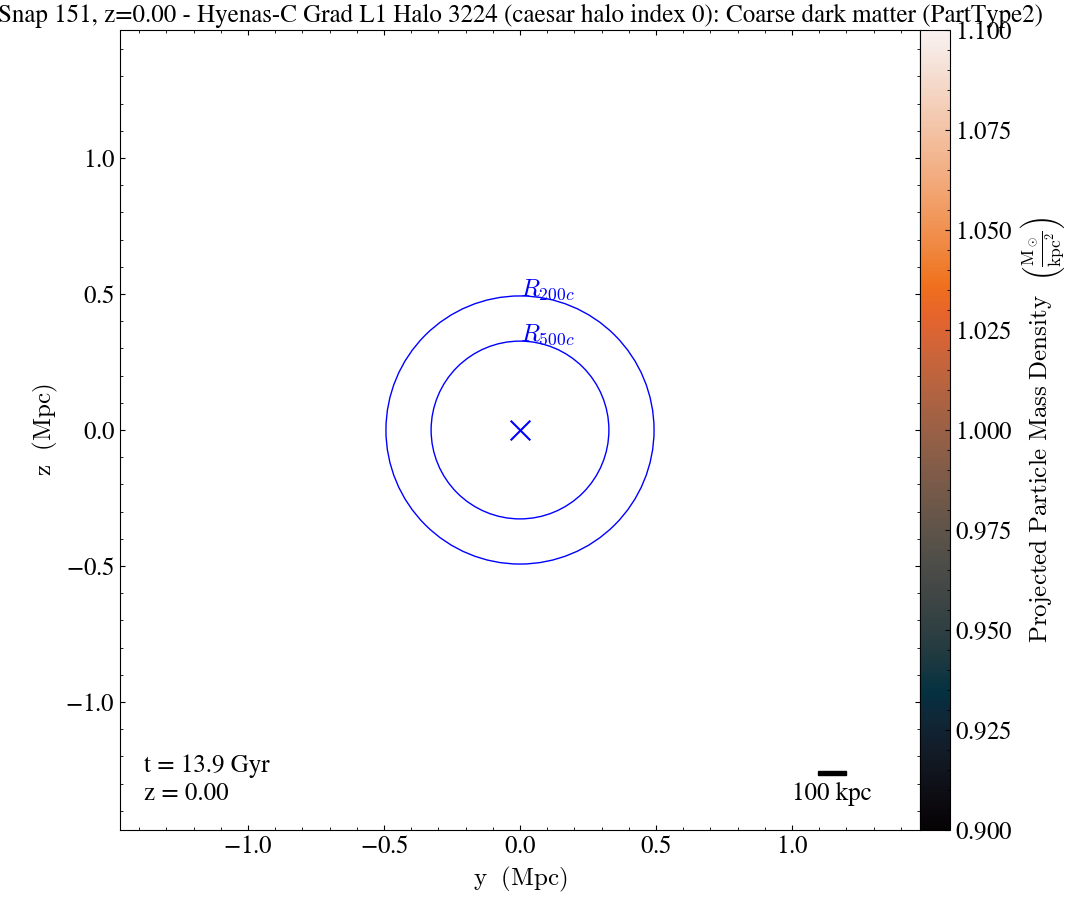

In [275]:
px_sphere_dm2.set_cmap(('PartType2', 'particle_mass'), 'cmyt.dusk')
# px_sphere_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun')
px_sphere_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun/kpc**2')
px_sphere_dm2.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): Coarse dark matter (PartType2)')
px_sphere_dm2.zoom(100)
px_sphere_dm2.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_sphere_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_sphere_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_sphere_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_dm2.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_sphere_dm2.annotate_scale(size_bar_args={'color':'black'})

In [99]:
px_dm2 = yt.ParticlePlot(snap, ('PartType2', 'particle_position_y'), ('PartType2', 'particle_position_z'),
                           ('PartType2', 'particle_mass'),#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType2', 'Potential'))

yt : [INFO     ] 2025-03-27 14:57:27,676 xlim = -1397.117188 198602.882812
yt : [INFO     ] 2025-03-27 14:57:27,678 ylim = -8428.367188 191571.632812
yt : [INFO     ] 2025-03-27 14:57:27,682 xlim = -1397.117188 198602.882812
yt : [INFO     ] 2025-03-27 14:57:27,682 ylim = -8428.367188 191571.632812
yt : [INFO     ] 2025-03-27 14:57:27,684 Splatting (('PartType2', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'


In [ ]:
px_dm2.set_cmap(('PartType2', 'particle_mass'), 'cmyt.dusk')
# px_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun')
px_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun/kpc**2')
px_dm2.annotate_title(f'{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): coarse dark matter (PartType2)')
px_dm2.zoom(150)
px_dm2.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_dm2.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_dm2.annotate_scale(size_bar_args={'color':'black'})

In [208]:
px_slab_dm2 = yt.ParticlePlot(snap, ('PartType2', 'particle_position_y'), ('PartType2', 'particle_position_z'),
                           ('PartType2', 'particle_mass'), depth=10*specific_halo_r200c,#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType2', 'Potential'))

yt : [INFO     ] 2025-08-10 18:32:04,906 xlim = -3618.125000 196381.875000
yt : [INFO     ] 2025-08-10 18:32:04,907 ylim = -1941.718750 198058.281250
yt : [INFO     ] 2025-08-10 18:32:04,910 xlim = -3618.125000 196381.875000
yt : [INFO     ] 2025-08-10 18:32:04,910 ylim = -1941.718750 198058.281250
yt : [INFO     ] 2025-08-10 18:32:04,911 Splatting (('PartType2', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'


In [ ]:
px_slab_dm2.set_cmap(('PartType2', 'particle_mass'), 'cmyt.dusk')
# px_sphere_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun')
px_slab_dm2.set_unit(('PartType2', 'particle_mass'), 'Msun/kpc**2')
px_slab_dm2.annotate_title(f'{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): dark matter (PartType2)')
px_slab_dm2.zoom(75)
px_slab_dm2.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='blue', s=200)
px_slab_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_slab_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_slab_dm2.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_slab_dm2.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_slab_dm2.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_slab_dm2.annotate_scale(size_bar_args={'color':'black'})

In [ ]:
px_dm.set_cmap(('PartType2', 'particle_mass'), 'cmyt.dusk')

In [ ]:
# px_dm.set_unit(('PartType2', 'particle_mass'), 'Msun')
px_dm.set_unit(('PartType2', 'particle_mass'), 'Msun/kpc**2')

In [ ]:
px_dm.zoom(4)

## dark matter (hi-res)

In [276]:
px_sphere_dm1 = yt.ParticlePlot(snap, ('PartType1', 'particle_position_y'), ('PartType1', 'particle_position_z'),
                           ('PartType1', 'particle_mass'), data_source=sphere,#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType1', 'Potential'))

yt : [INFO     ] 2025-08-10 18:39:57,634 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:57,635 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:57,637 xlim = -3501.023438 196498.976562
yt : [INFO     ] 2025-08-10 18:39:57,638 ylim = -2243.367188 197756.632812
yt : [INFO     ] 2025-08-10 18:39:57,639 Splatting (('PartType1', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



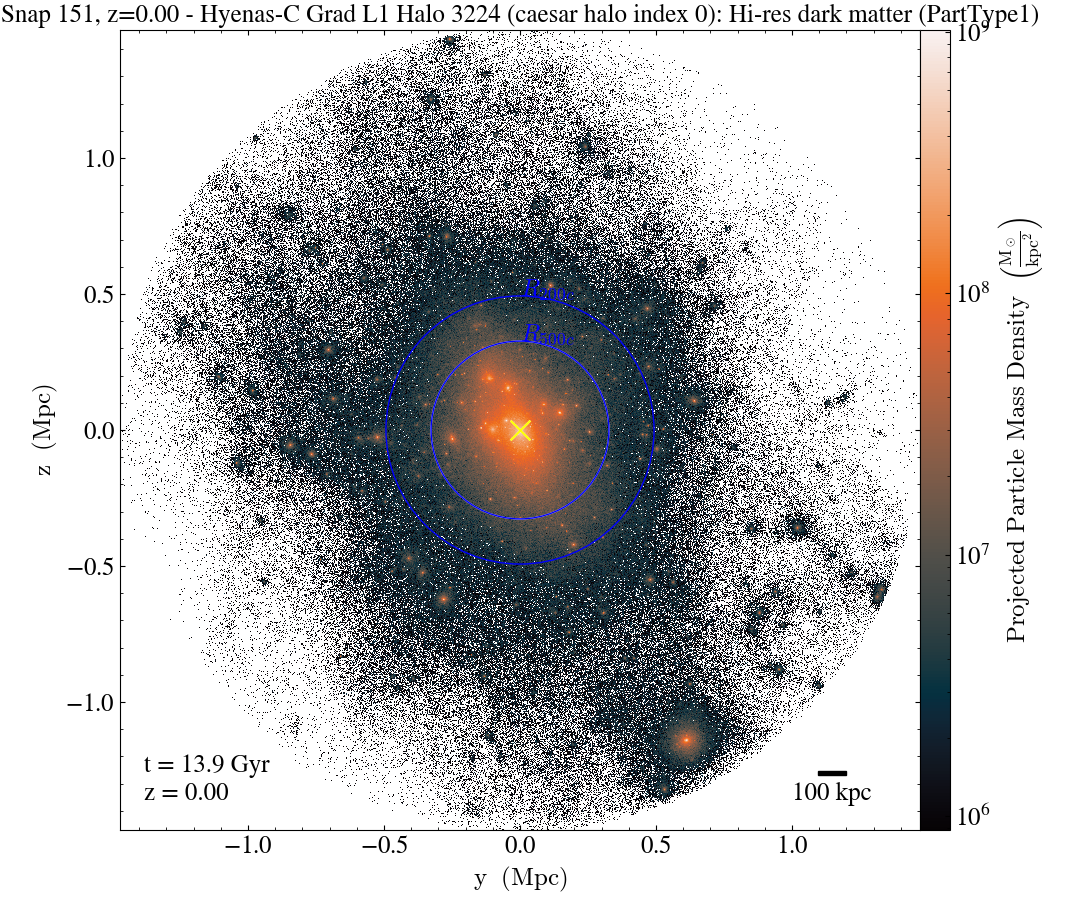

In [277]:
px_sphere_dm1.set_cmap(('PartType1', 'particle_mass'), 'cmyt.dusk')
# px_sphere_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun')
px_sphere_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun/kpc**2')

px_sphere_dm1.annotate_title(f'Snap {snap_num}, z={snap.current_redshift:.2f} - {sim} L{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): Hi-res dark matter (PartType1)')
px_sphere_dm1.zoom(100)
px_sphere_dm1.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='white', s=200)
px_sphere_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'white'})

px_sphere_dm1.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='yellow', s=200)
px_sphere_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'blue'})
px_sphere_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'blue'})
px_sphere_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'blue'})
px_sphere_dm1.annotate_timestamp(time=True, redshift=True, text_args={'color':'black'})
px_sphere_dm1.annotate_scale(size_bar_args={'color':'black'})

# px_sphere_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
#                      r'$R_{500c}$', coord_system='data', text_args={'color':'white'})
# px_sphere_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'white'})
# px_sphere_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
#                      r'$R_{200c}$', coord_system='data', text_args={'color':'white'})
# px_sphere_dm1.annotate_timestamp(corner='upper_left', time=True, redshift=True, text_args={'color':'white'})
# px_sphere_dm1.annotate_scale(corner='upper_right', size_bar_args={'color':'white'})

In [ ]:
px_dm1 = yt.ParticlePlot(snap, ('PartType1', 'particle_position_y'), ('PartType1', 'particle_position_z'),
                           ('PartType1', 'particle_mass'),#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType1', 'Potential'))

yt : [INFO     ] 2025-03-27 04:14:17,280 xlim = -12759.164062 187240.835938
yt : [INFO     ] 2025-03-27 04:14:17,282 ylim = 8811.531250 208811.531250
yt : [INFO     ] 2025-03-27 04:14:17,284 xlim = -12759.164062 187240.835938
yt : [INFO     ] 2025-03-27 04:14:17,285 ylim = 8811.531250 208811.531250
yt : [INFO     ] 2025-03-27 04:14:17,286 Splatting (('PartType1', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'


In [ ]:
px_dm1.set_cmap(('PartType1', 'particle_mass'), 'cmyt.dusk')
# px_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun')
px_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun/kpc**2')
px_dm1.annotate_title(f'{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): dark matter (PartType1)')
px_dm1.zoom(100)
px_dm1.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='white', s=200)
px_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'white'})
px_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'white'})
px_dm1.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'white'})
px_dm1.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'white'})
px_dm1.annotate_timestamp(corner='upper_left', time=True, redshift=True, text_args={'color':'white'})
px_dm1.annotate_scale(corner='upper_right', size_bar_args={'color':'white'})

In [ ]:
px_dm1.set_cmap(('PartType1', 'particle_mass'), 'cmyt.dusk')

In [ ]:
px_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun')
# px_dm1.set_unit(('PartType1', 'particle_mass'), 'Msun/kpc**2')

In [ ]:
px_dm1.zoom(4)

## dark matter (PartType3)

In [126]:
px_sphere_dm3 = yt.ParticlePlot(snap, ('PartType3', 'particle_position_y'), ('PartType3', 'particle_position_z'),
                           ('PartType3', 'particle_mass'), data_source=sphere,#)
                           density=True, center=specific_halo_pos)#,
#                            weight_field=('PartType1', 'Potential'))

YTFieldNotFound: Could not find field ('PartType3', 'particle_position_y') in snap_halo_3224_151.
Did you mean:
	('PartType0', 'particle_position_y')
	('PartType1', 'particle_position_y')
	('PartType2', 'particle_position_y')
	('PartType4', 'particle_position_y')
	('PartType5', 'particle_position_y')
	('all', 'particle_position_y')
	('gas', 'particle_position_y')
	('nbody', 'particle_position_y')
	('PartType0', 'particle_position_x')
	('PartType0', 'particle_position_z')
	('PartType1', 'particle_position_x')
	('PartType1', 'particle_position_z')
	('PartType2', 'particle_position_x')
	('PartType2', 'particle_position_z')
	('PartType4', 'particle_position_x')
	('PartType4', 'particle_position_z')
	('PartType5', 'particle_position_x')
	('PartType5', 'particle_position_z')


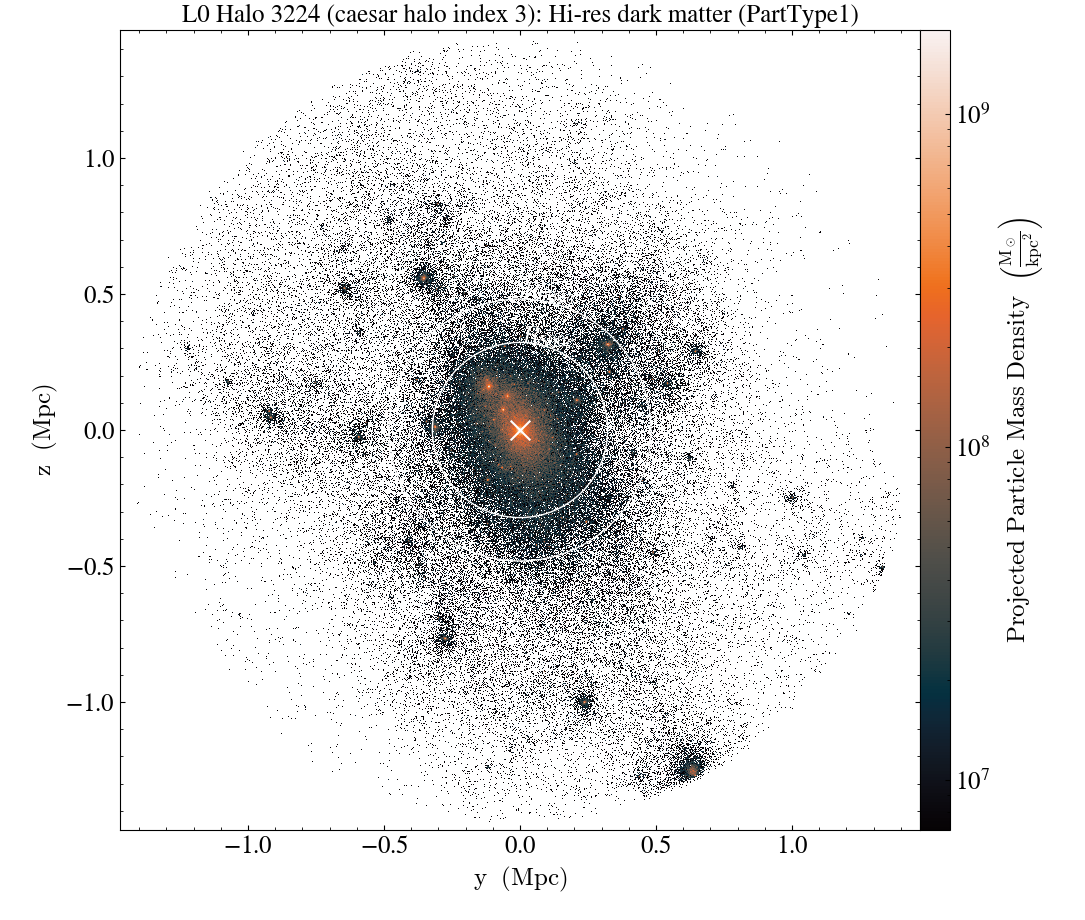

In [125]:
px_sphere_dm3.set_cmap(('PartType3', 'particle_mass'), 'cmyt.dusk')
# px_sphere_dm3.set_unit(('PartType3', 'particle_mass'), 'Msun')
px_sphere_dm3.set_unit(('PartType3', 'particle_mass'), 'Msun/kpc**2')
px_sphere_dm3.annotate_title(f'{res_level} Halo {halo_id} (caesar halo index {specific_halo_index}): dark matter (PartType3)')
px_sphere_dm3.zoom(100)
px_sphere_dm3.annotate_marker((specific_halo_pos), marker='x', coord_system='data', color='white', s=200)
px_sphere_dm3.annotate_sphere(specific_halo_pos, radius=specific_halo_r500c, coord_system='data', circle_args={'color':'white'})
px_sphere_dm3.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r500c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{500c}$', coord_system='data', text_args={'color':'white'})
px_sphere_dm3.annotate_sphere(specific_halo_pos, radius=specific_halo_r200c, coord_system='data', circle_args={'color':'white'})
px_sphere_dm3.annotate_text(specific_halo_pos+unyt.unyt_array([0,0,specific_halo_r200c.to(specific_halo_pos.units).value], specific_halo_pos.units),
                     r'$R_{200c}$', coord_system='data', text_args={'color':'white'})
px_sphere_dm3.annotate_timestamp(corner='upper_left', time=True, redshift=True, text_args={'color':'white'})
px_sphere_dm3.annotate_scale(corner='upper_right', size_bar_args={'color':'white'})

## All

In [ ]:
px_all = yt.ParticlePlot(snap, ('all', 'particle_position_y'), ('all', 'particle_position_z'),
                           ('all', 'particle_mass'),#)
                           density=True,)
#                            weight_field=('PartType2', 'particle_ones'))

In [ ]:
px_all.set_cmap(('all', 'particle_mass'), 'cmyt.dusk')

In [ ]:
# px_dm.set_unit(('PartType2', 'particle_mass'), 'Msun')
px_all.set_unit(('all', 'particle_mass'), 'Msun/kpc**2')

In [ ]:
px_all.zoom(4)